In [82]:


from typing import Tuple

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.axis import Axis
from matplotlib.figure import Figure
import torch

plt.style.use("figs/matplotlibrc")
cmap_name = "inferno"

(<Figure size 2560x1920 with 1 Axes>,
 <Axes: title={'center': 'ConstantLR'}, xlabel='epoch', ylabel='learning rate'>)

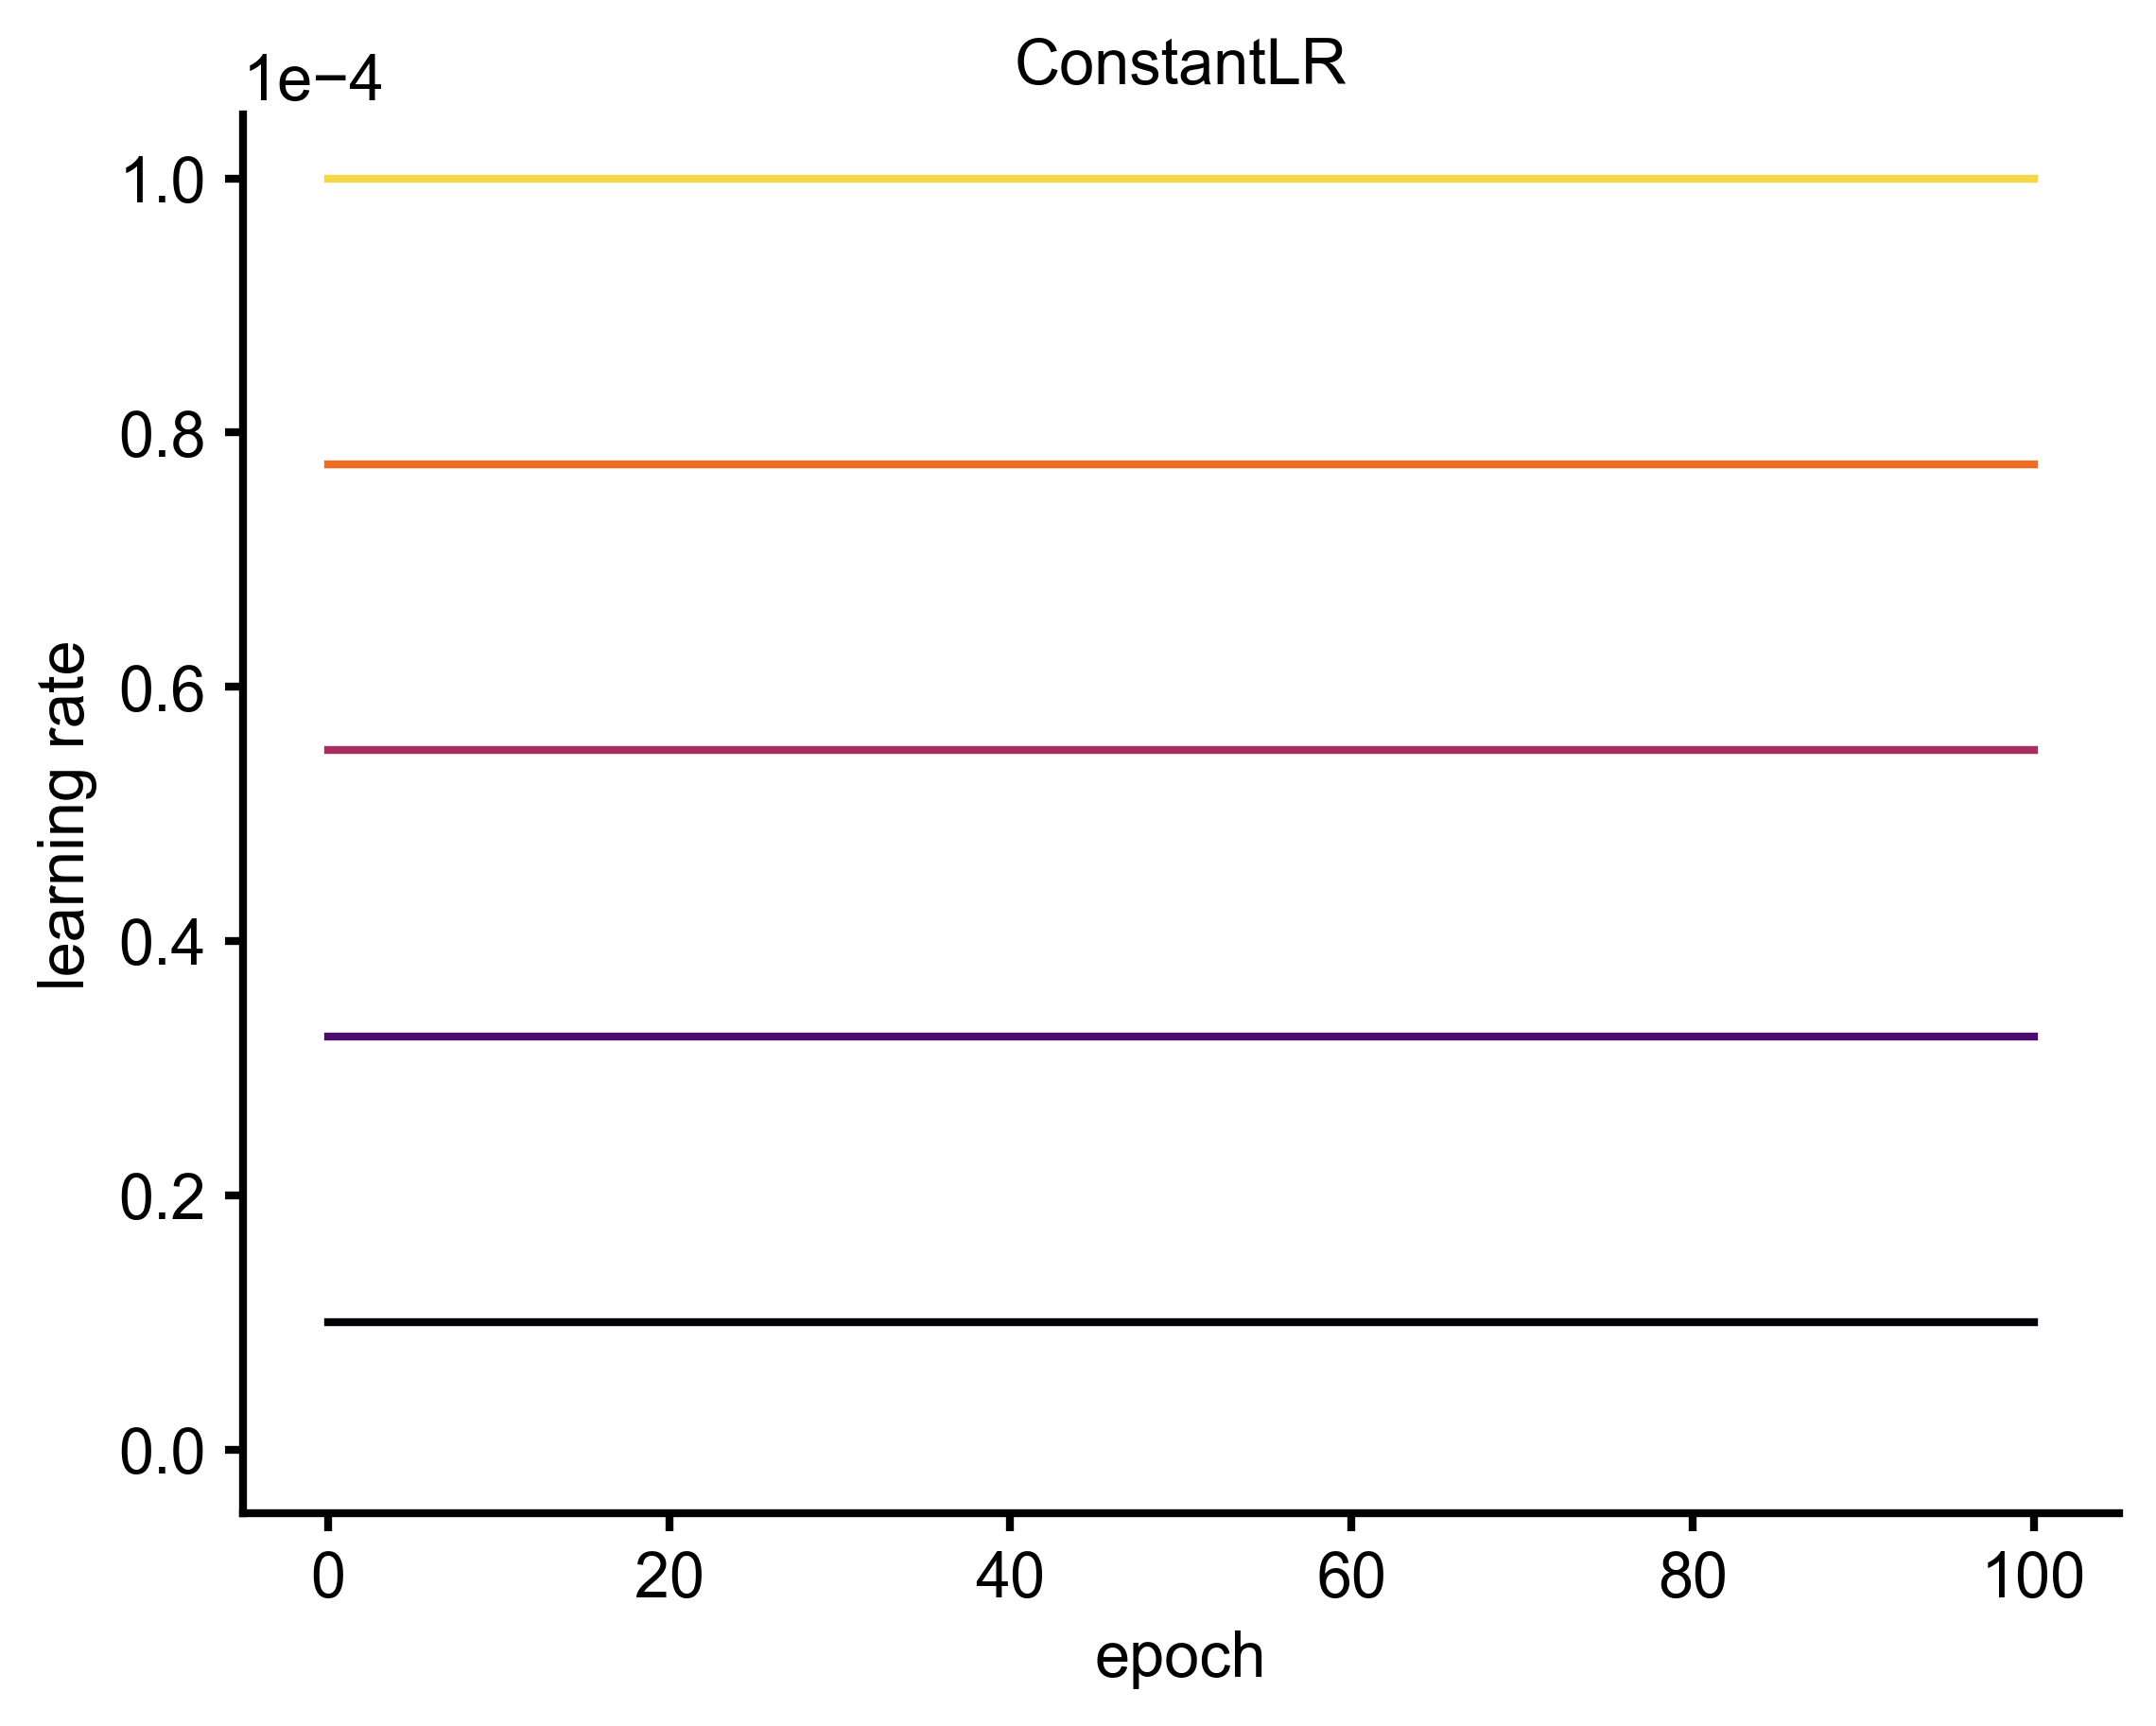

In [83]:

def plot_constant_lr(lrs: np.ndarray) -> Tuple[Figure, Axis]:
    fig, ax = plt.subplots()
    x = np.linspace(0, 100, 1000)

    y = (np.ones_like(x)[None].repeat(len(lrs), axis=0).T * lrs)
    colors = mpl.colormaps[cmap_name](np.linspace(0, .9, len(lrs)))
    for curve, color in zip(y.T, colors):
        ax.plot(x, curve, c=color)

    ax.set_ylim((-5e-06, 0.000105))
    ax.set_title("ConstantLR")
    ax.set_xlabel("epoch")
    ax.set_ylabel("learning rate")
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    fig.savefig("figs/standard/ConstantLR.pdf")    
    return fig, ax
plot_constant_lr(np.linspace(1, 10, 5) / 10**5)


(<Figure size 2560x1920 with 1 Axes>,
 <Axes: title={'center': 'CosineAnnealing'}, xlabel='epoch', ylabel='learning rate'>)

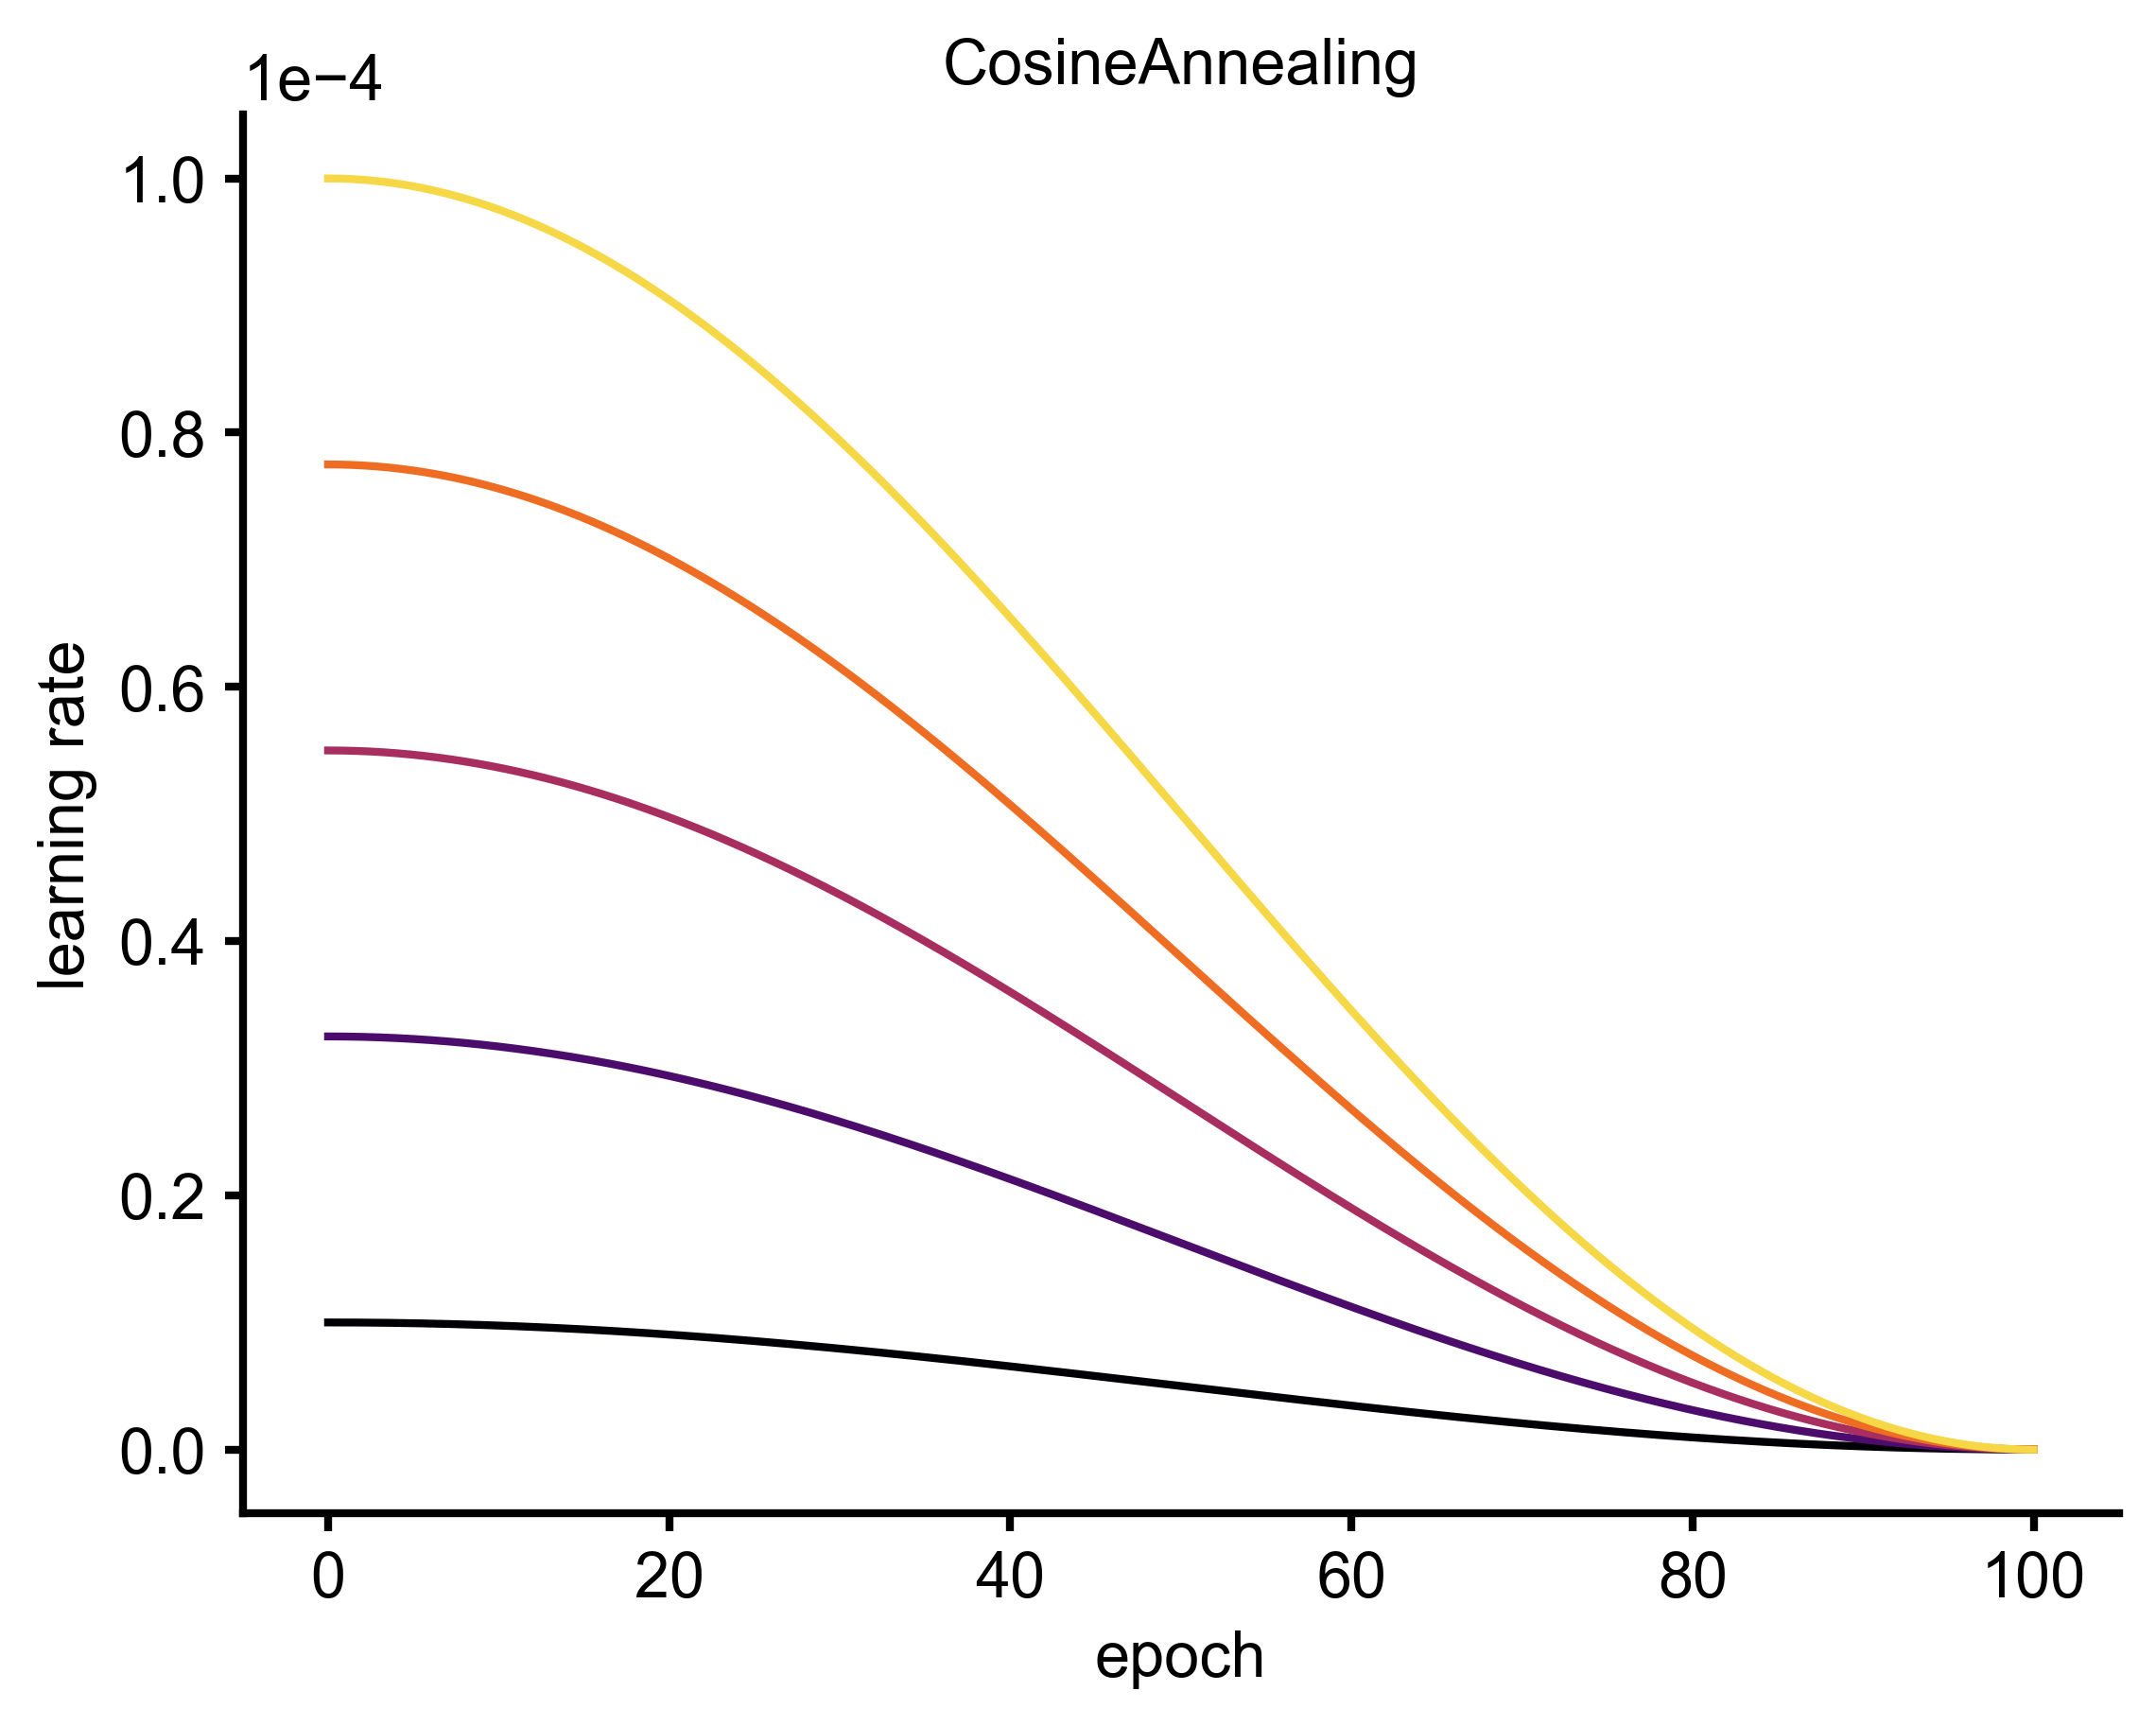

In [84]:
def plot_cosine_annealing(lrs: np.ndarray) -> Tuple[Figure, Axis]:
    fig, ax = plt.subplots()
    x = np.linspace(0, 100, 1000)

    y = (np.cos(x / 100 * np.pi) + 1) / 2

    y = y[None].repeat(len(lrs), axis=0).T * lrs
    
    colors = mpl.colormaps[cmap_name](np.linspace(0, 0.9, len(lrs)))
    for curve, color in zip(y.T, colors):
        ax.plot(x, curve, c=color)
    
    ax.set_ylim((-5e-06, 0.000105))
    ax.set_title("CosineAnnealing")
    ax.set_xlabel("epoch")
    ax.set_ylabel("learning rate")
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    fig.savefig("figs/standard/CosineAnnealingLR.pdf")    
    
    return fig, ax

plot_cosine_annealing(np.linspace(1, 10, 5) / 10**5)



(<Figure size 2560x1920 with 1 Axes>,
 <Axes: title={'center': 'Step LR'}, xlabel='epoch', ylabel='learning rate'>)

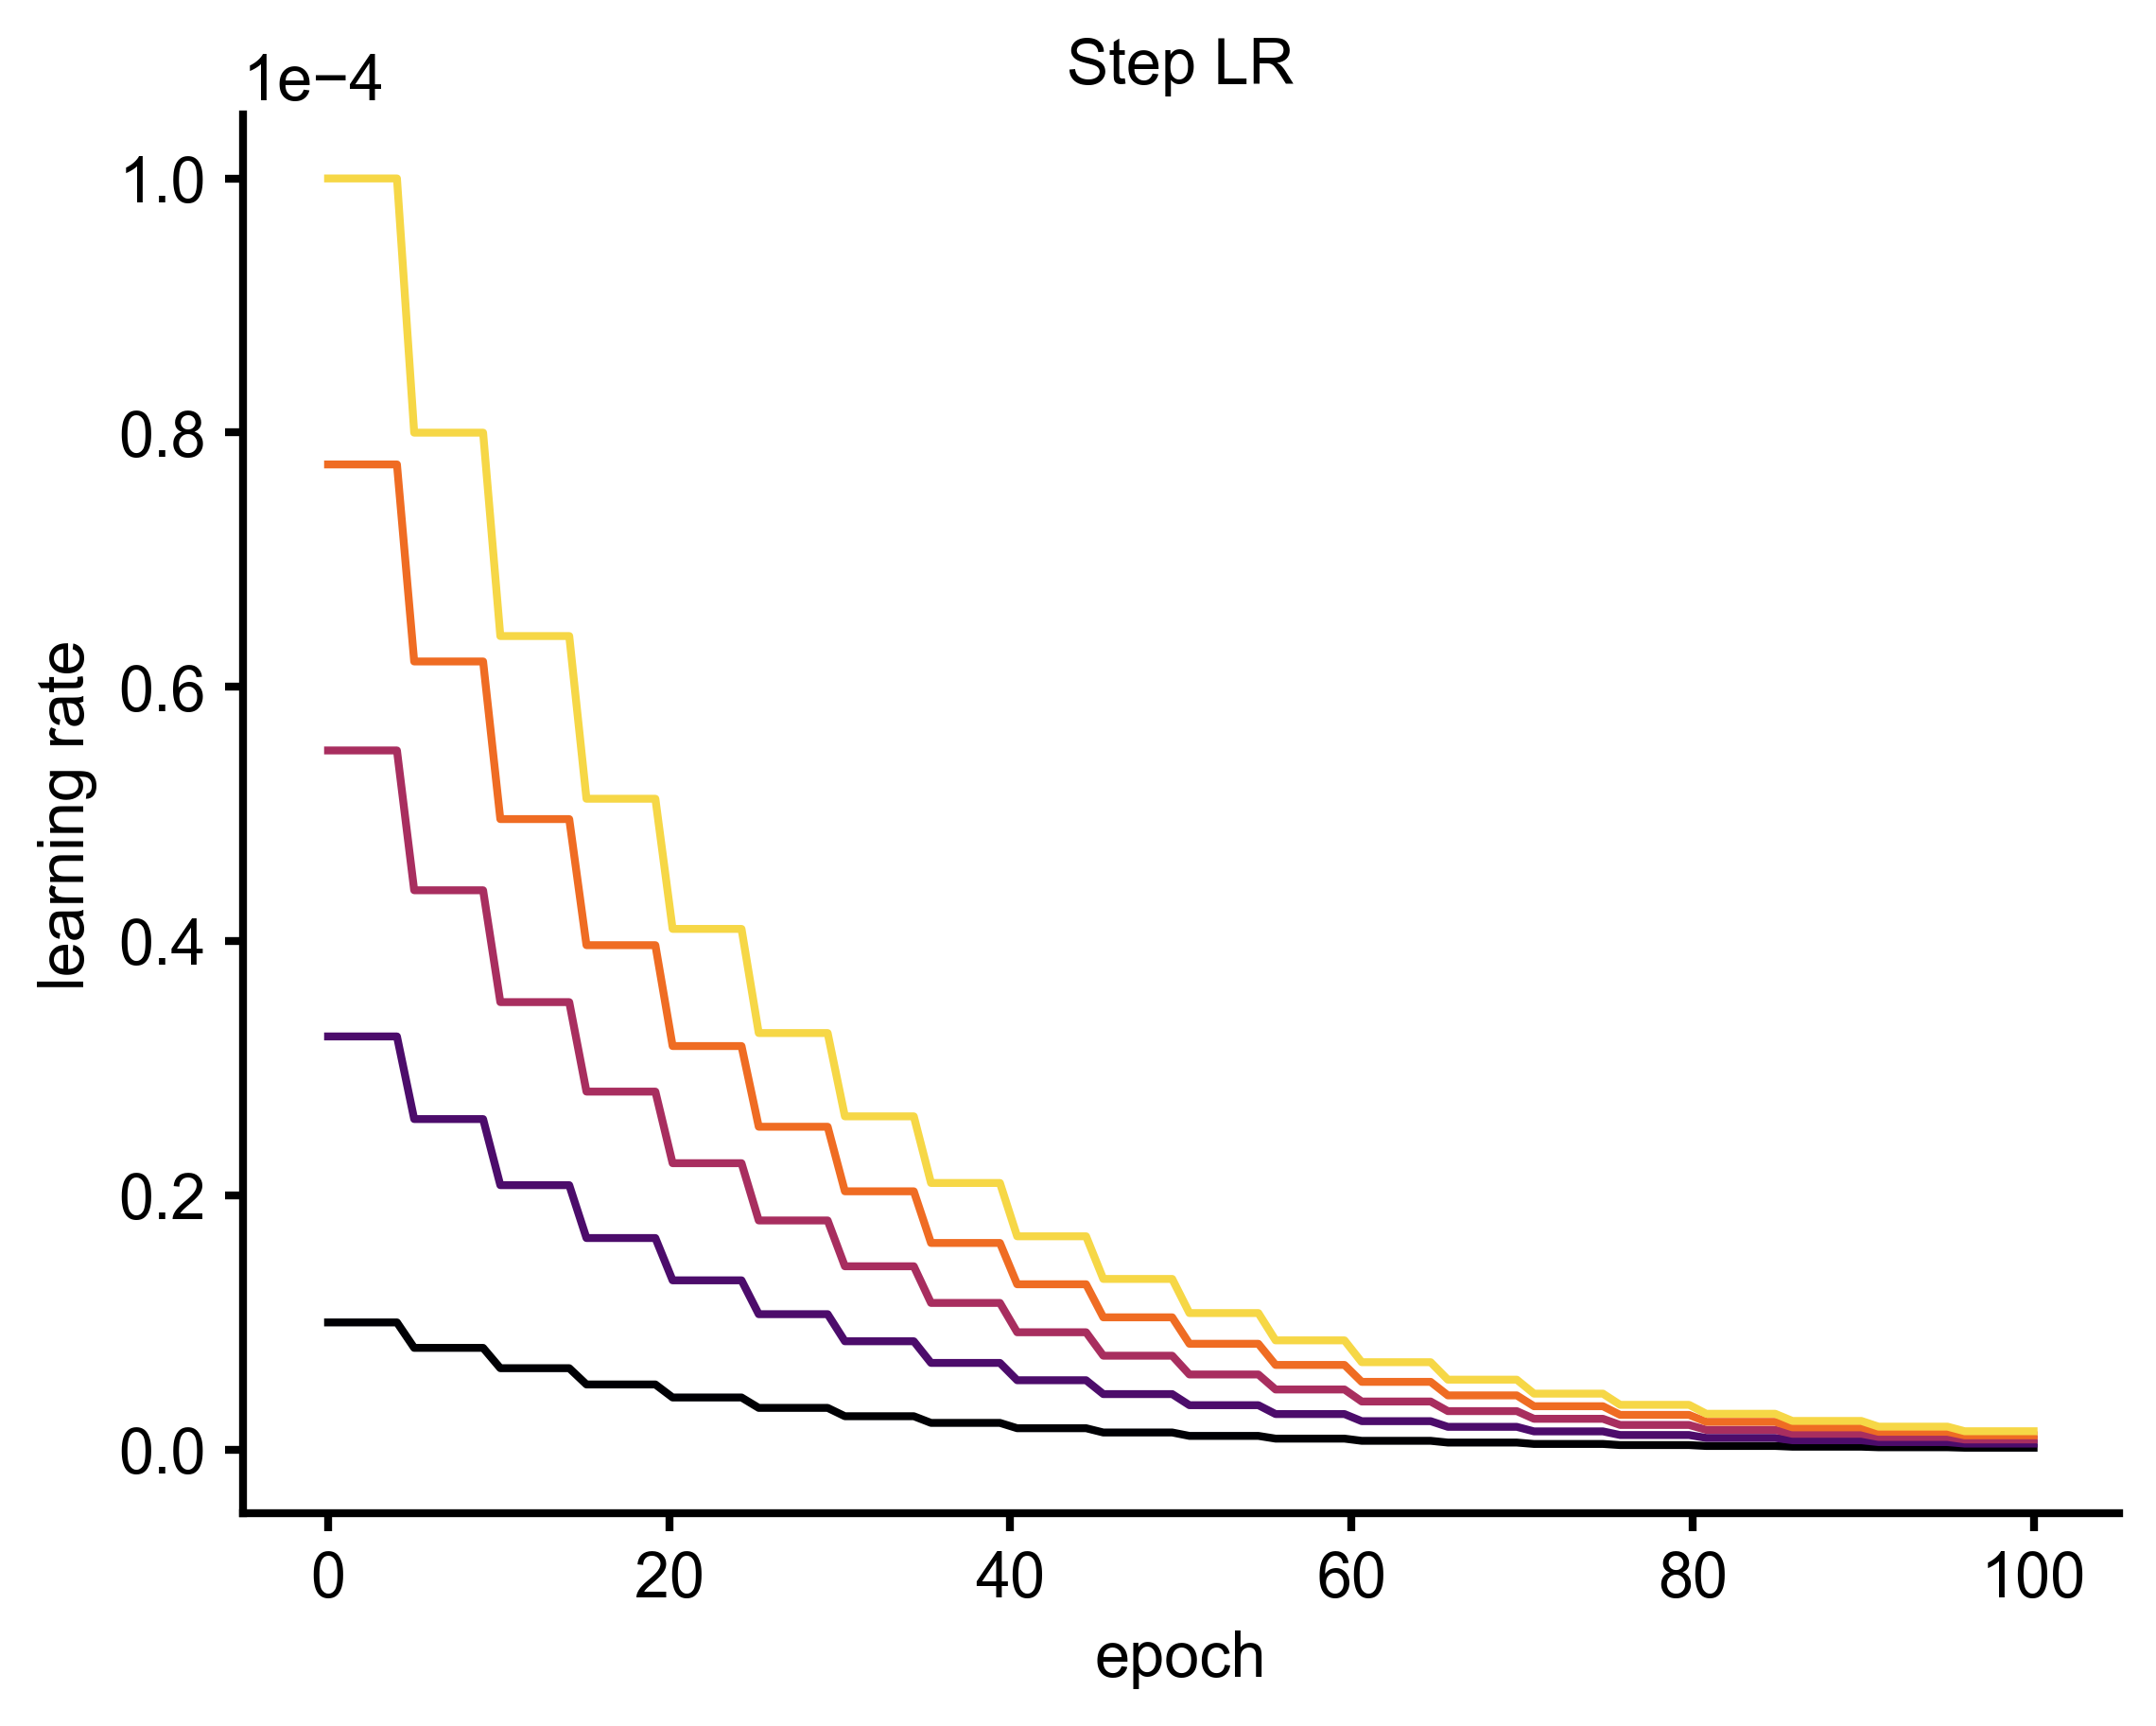

In [85]:
def plot_step_lr(lrs: np.ndarray, step_size: int = 5, gamma: float = 0.8) -> Tuple[Figure, Axis]:
    fig, ax = plt.subplots()
    x = np.linspace(0, 100, 100)
    
    y = gamma ** np.arange(100 // step_size)[None].repeat(step_size)
    y = y[None].repeat(len(lrs), axis=0).T * lrs
    colors = mpl.colormaps[cmap_name](np.linspace(0, 0.9, len(lrs)))
    for curve, color in zip(y.T, colors):
        ax.plot(x, curve, c=color)

    ax.set_ylim((-5e-06, 0.000105))
    ax.set_title("Step LR")
    ax.set_xlabel("epoch")
    ax.set_ylabel("learning rate")
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    
    fig.savefig("figs/standard/StepLR.pdf")    
    
    return fig, ax

plot_step_lr(np.linspace(1, 10, 5) / 10**5)


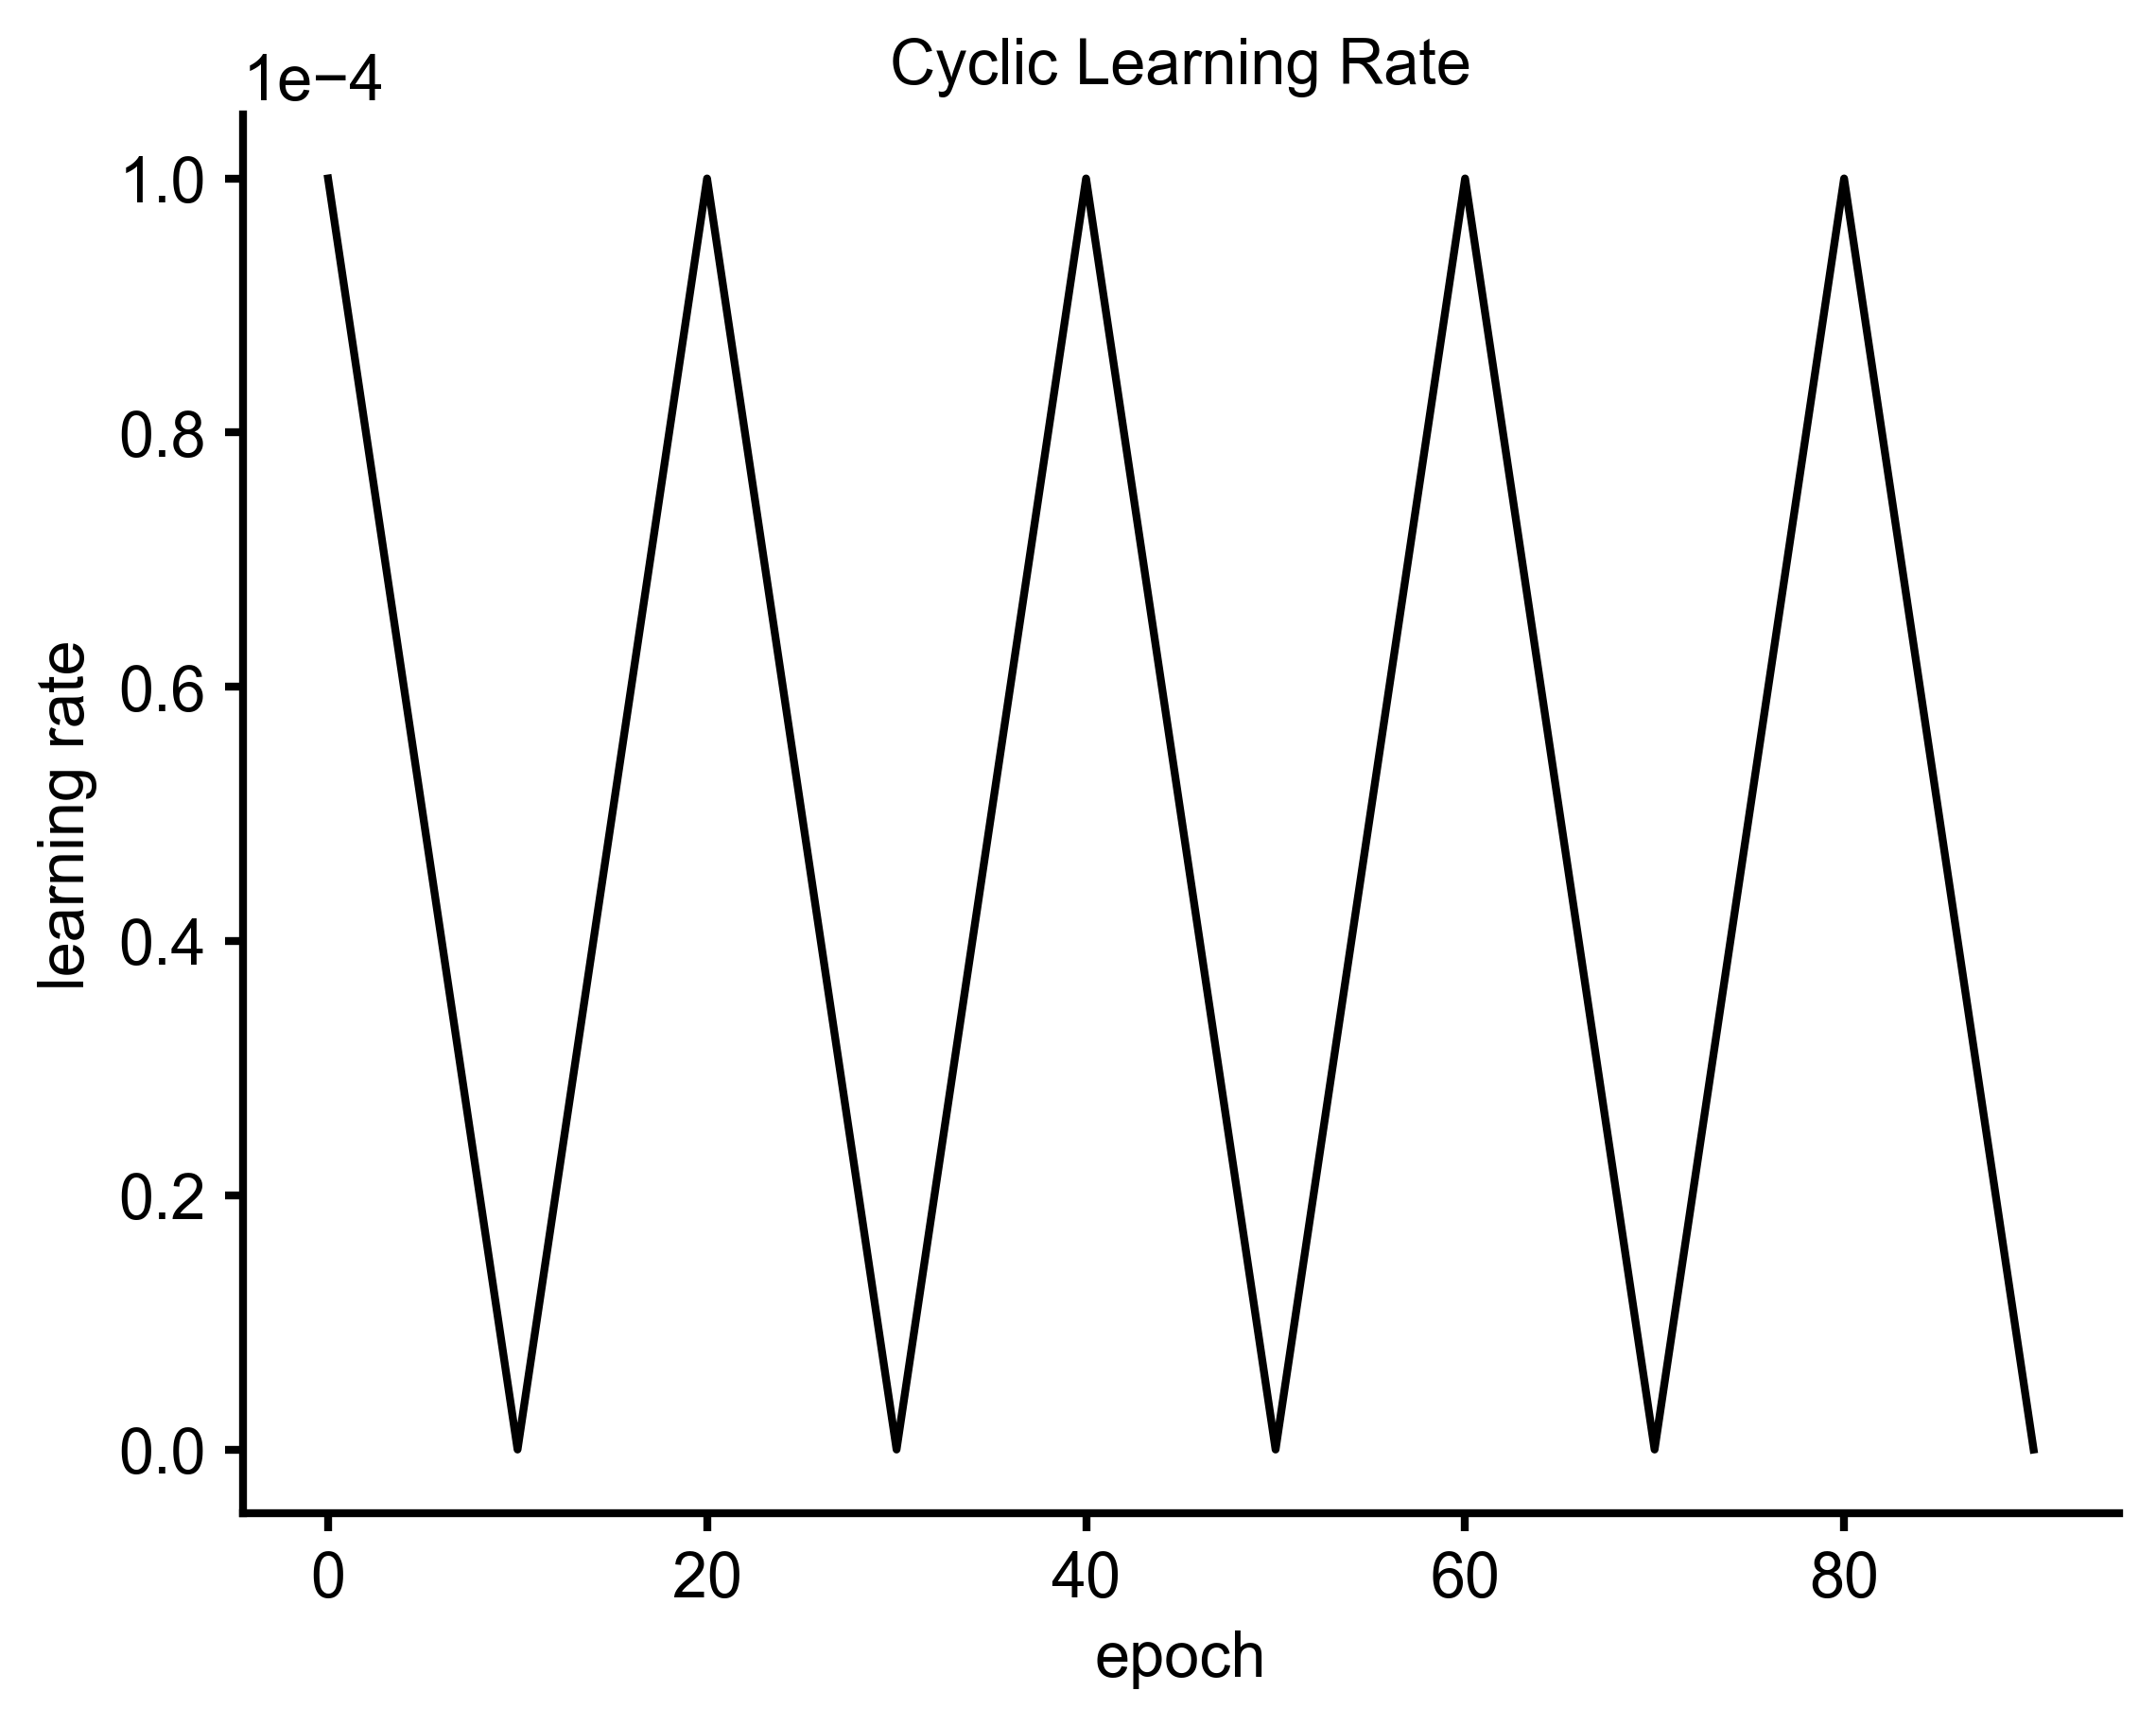

In [86]:
def plot_cyclic_lr(step_size: int):
    fig, ax = plt.subplots()
    
    x = np.arange(100 // step_size) * step_size
    y = np.array([10**-4, 0])[None].repeat(len(x) //2, axis=0).flatten()
    ax.plot(x, y, c="k")  

    ax.set_ylim((-5e-06, 0.000105))
    ax.set_title("Cyclic Learning Rate")
    ax.set_xlabel("epoch")
    ax.set_ylabel("learning rate")
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    
    fig.savefig("figs/standard/CyclicLR.pdf")    
    
    
plot_cyclic_lr(10)

/home/robin/miniconda3/envs/DLRK/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:143: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
/home/robin/miniconda3/envs/DLRK/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:1777: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


(<Figure size 2560x1920 with 1 Axes>,
 <Axes: title={'center': 'OneCycleLR'}, xlabel='epoch', ylabel='learning rate'>)

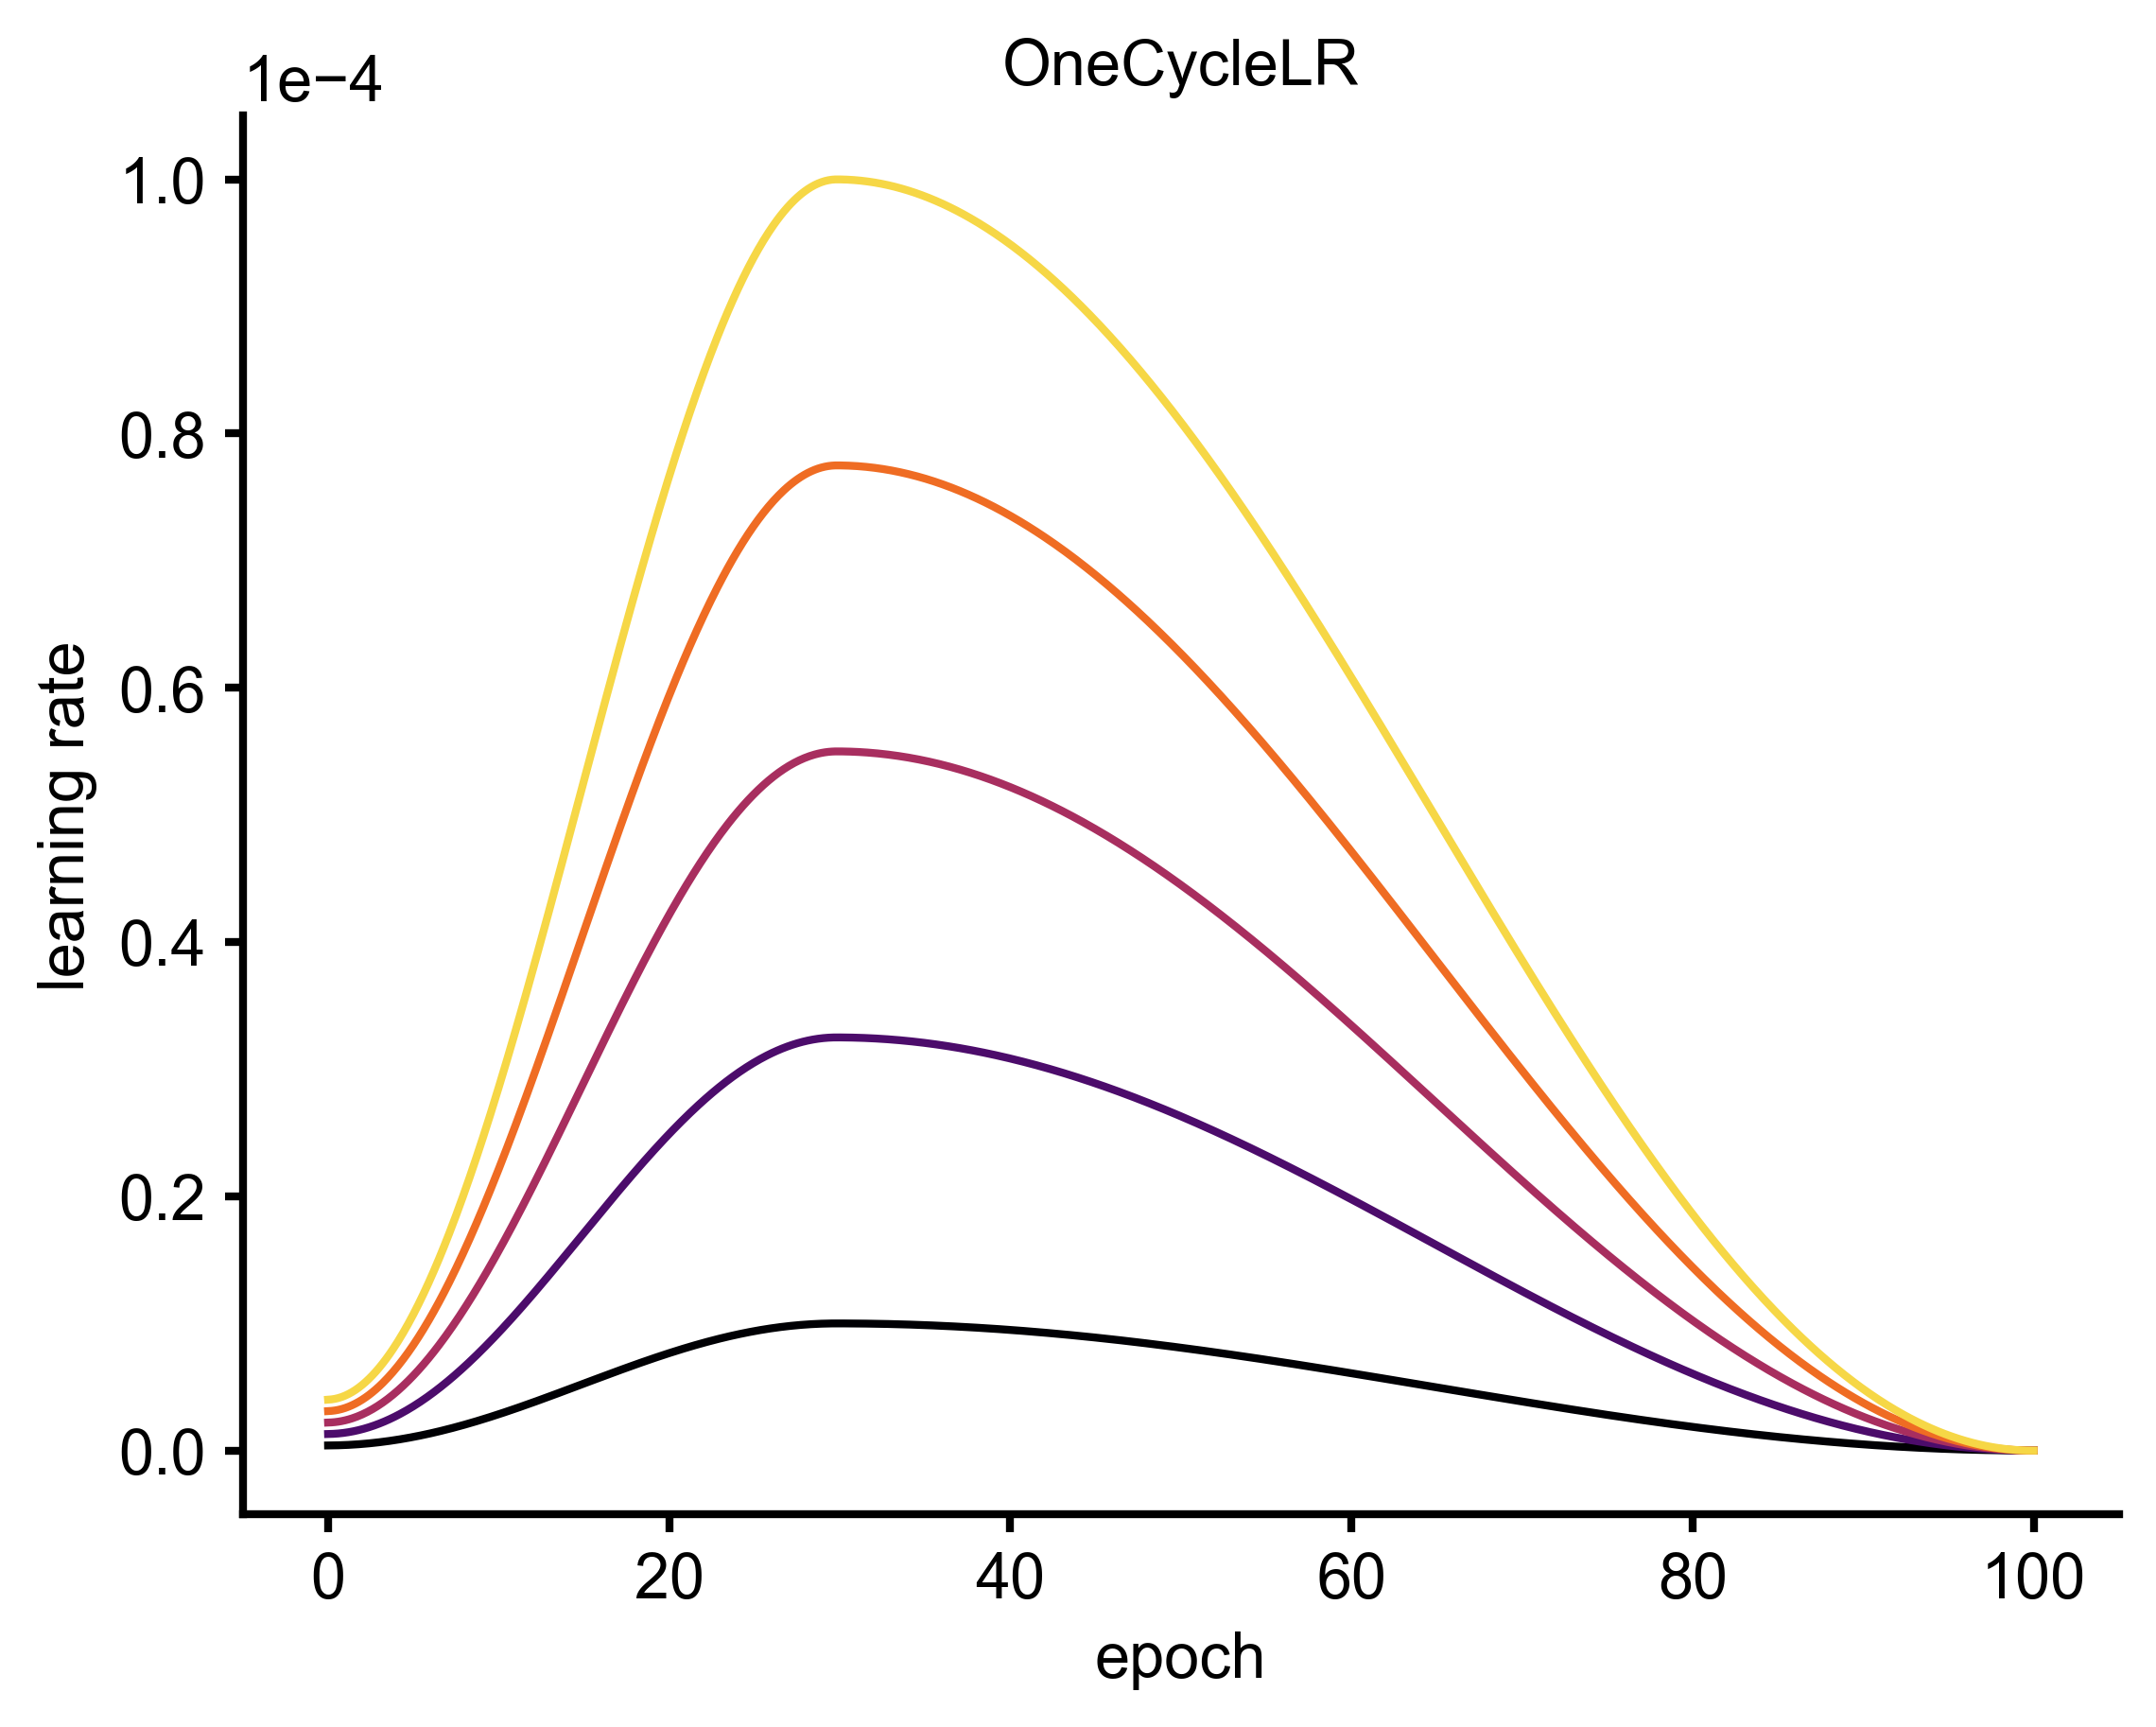

In [87]:
def plot_one_cycle(lrs: np.ndarray) -> Tuple[Figure, Axis]:
    fig, ax = plt.subplots()
    network  = torch.nn.Linear(10, 10)
    # optim = torch.optim.SGD(network.parameters())

    # scheduler = torch.optim.lr_scheduler.ConstantLR(optim, factor=1)
    n_epochs = 1000
    learning_rate = np.empty((len(lrs), n_epochs))
    for lr_idx, lr in enumerate(lrs):
        optim = torch.optim.AdamW(network.parameters(), lr=lr)
        scheduler = torch.optim.lr_scheduler.OneCycleLR(optim, max_lr=lr, total_steps=1000)
        for epoch in range(n_epochs):
            scheduler.step()
            learning_rate[lr_idx, epoch] = scheduler.get_lr()[0]

    x = np.linspace(0, 100, 1000)
    y = learning_rate.T
    colors = mpl.colormaps[cmap_name](np.linspace(0,0.9, len(lrs)))
    for curve, color in zip(y.T, colors):
        ax.plot(x, curve, c=color)

    ax.set_ylim((-5e-06, 0.000105))
    ax.set_title("OneCycleLR")
    ax.set_xlabel("epoch")
    ax.set_ylabel("learning rate")
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    fig.savefig("figs/standard/OneCycle.pdf")    
    
    return fig, ax

plot_one_cycle(np.linspace(1, 10, 5) / 10**5)


/home/robin/miniconda3/envs/DLRK/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:1453: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


(<Figure size 2560x1920 with 1 Axes>,
 <Axes: title={'center': 'CosineAnnealingWarmRestarts'}, xlabel='epoch', ylabel='learning rate'>)

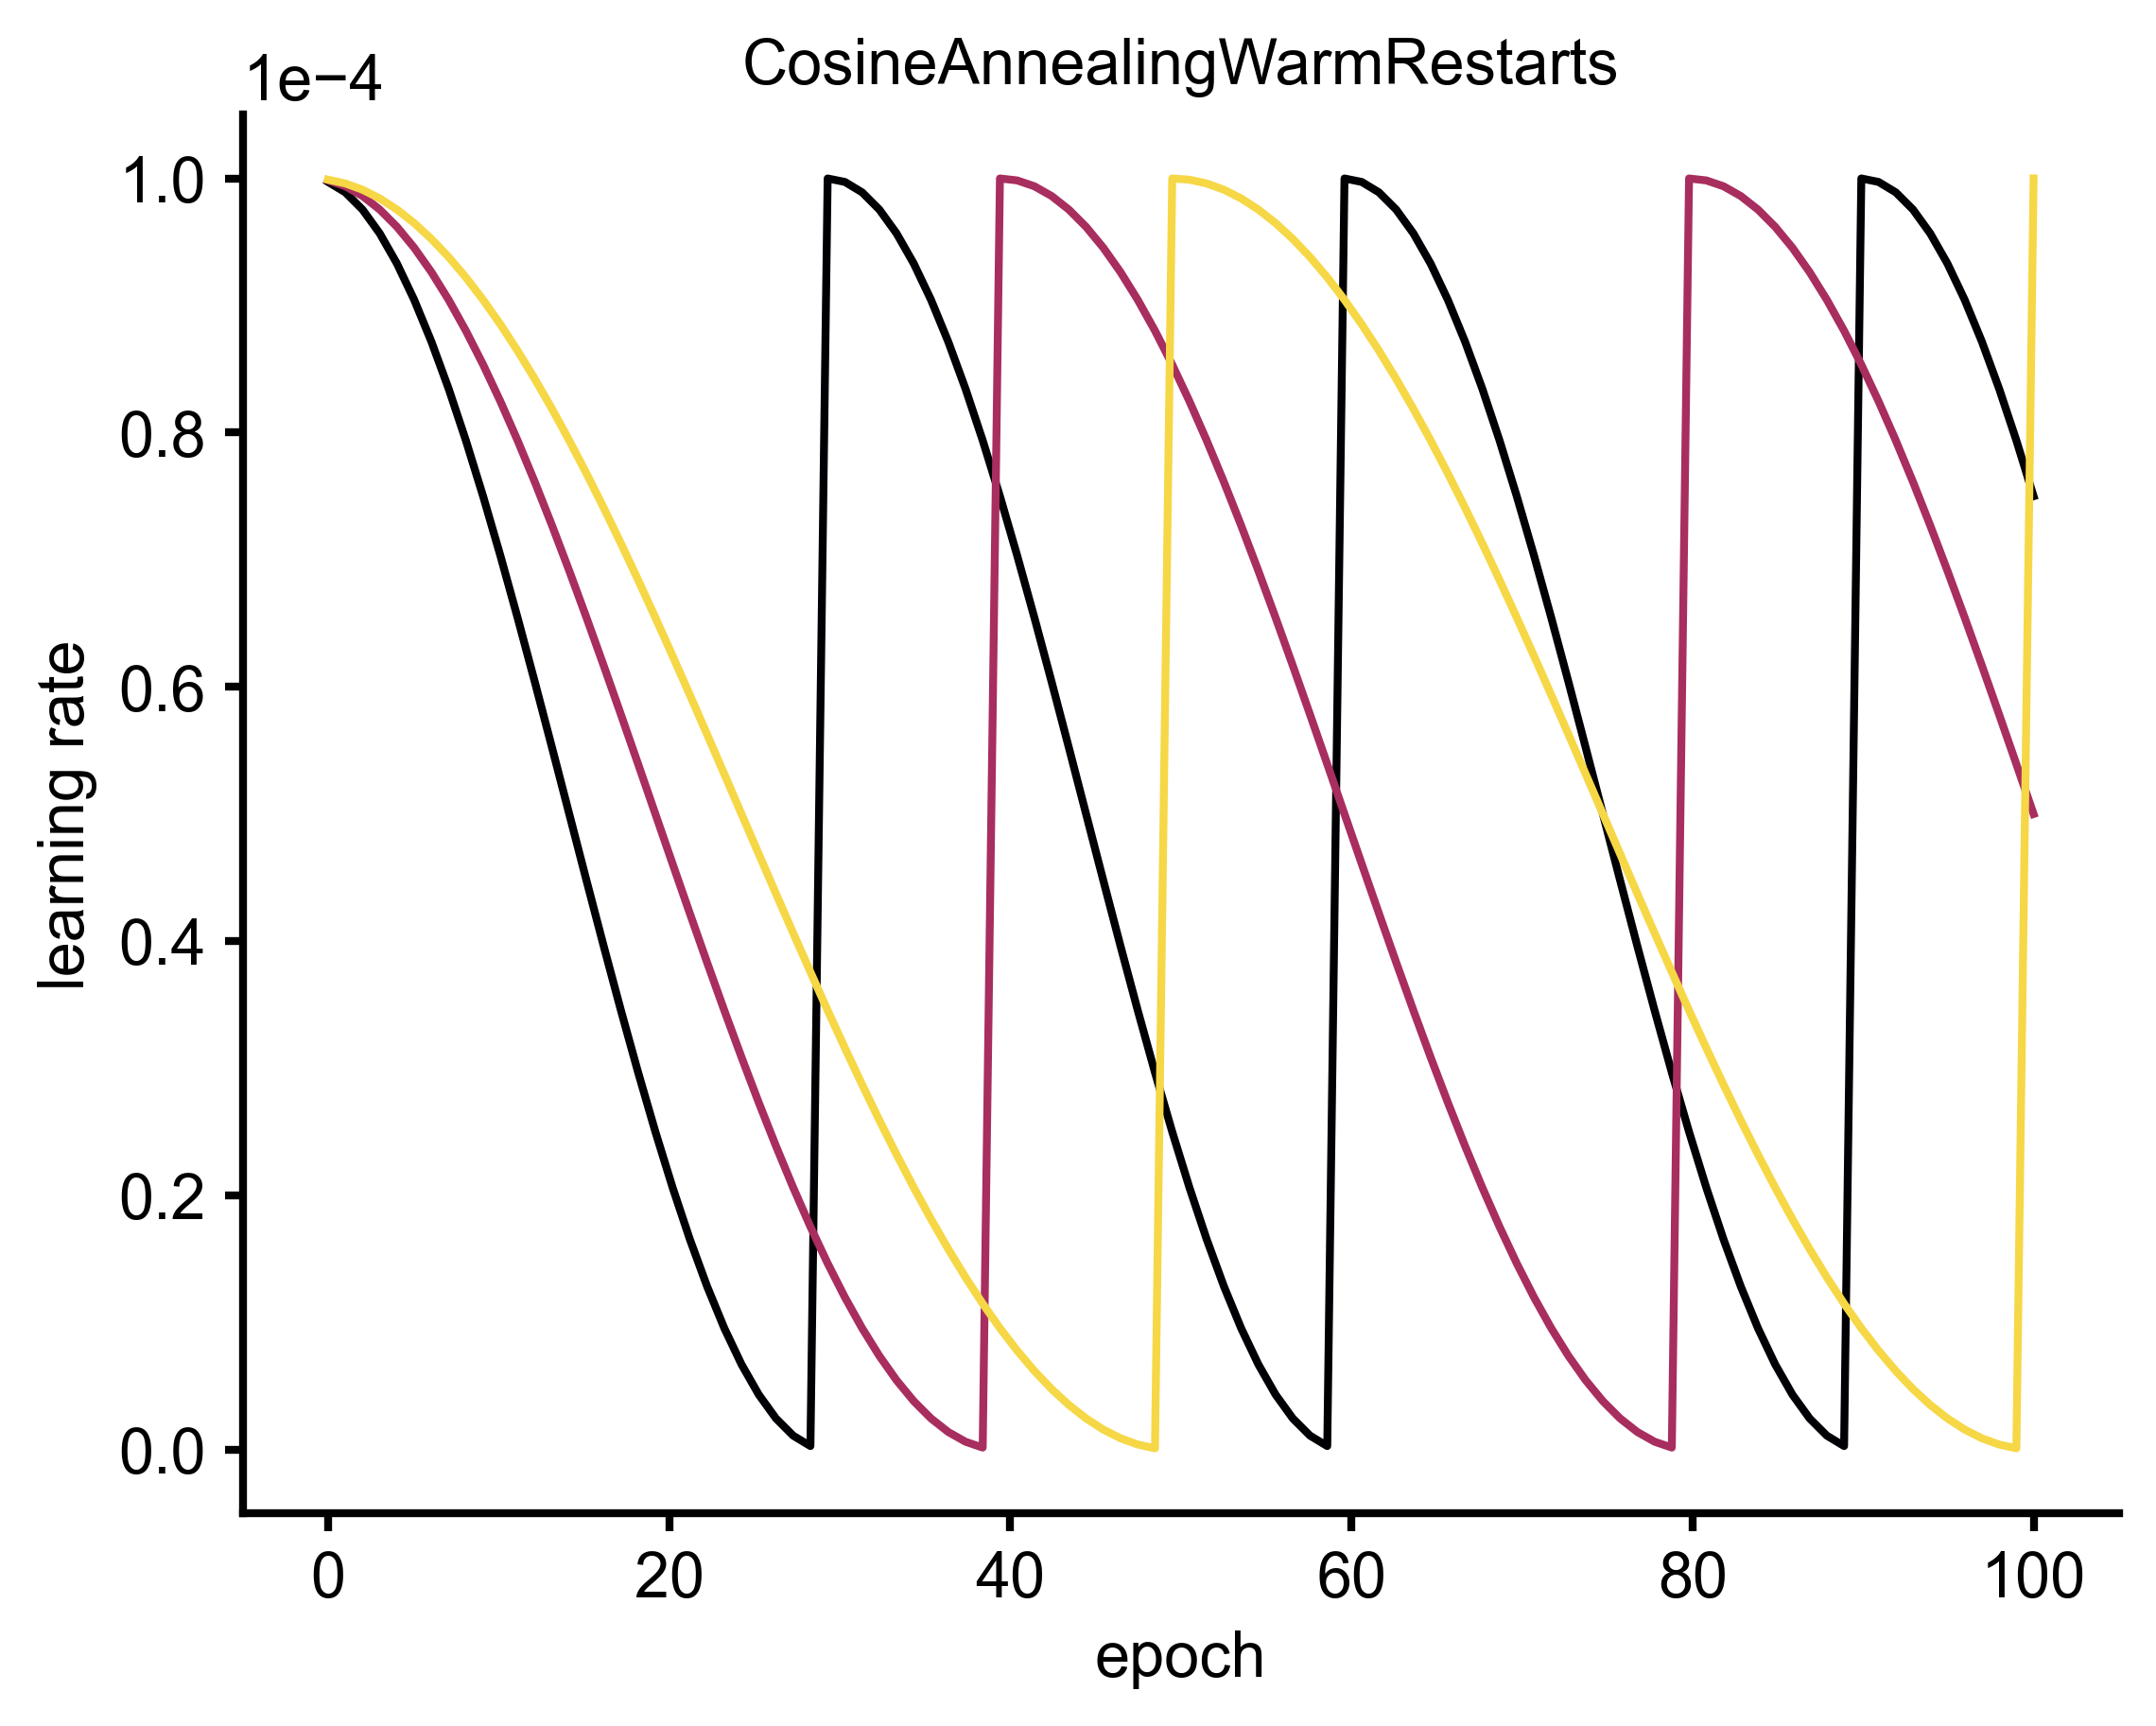

In [88]:
def plot_cosine_annealing_warm_restarts(step_size: np.ndarray) -> Tuple[Figure, Axis]:
    fig, ax = plt.subplots()
    network  = torch.nn.Linear(10, 10)
    
    n_epochs = 100
    learning_rate = np.empty((len(step_size), n_epochs))
    for lr_idx, lr in enumerate(step_size):
        optim = torch.optim.AdamW(network.parameters(), lr=10**-4)
        scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optim, T_0=int(lr))
        for epoch in range(n_epochs):
            scheduler.step()
            learning_rate[lr_idx, epoch] = scheduler.get_lr()[0]

    x = np.linspace(0, 100, 100)
    y = learning_rate.T
    colors = mpl.colormaps[cmap_name](np.linspace(0, .9, len(step_size)))
    for curve, color in zip(y.T, colors):
        ax.plot(x, curve, c=color)
        
    ax.set_ylim((-5e-06, 0.000105))
    ax.set_title("CosineAnnealingWarmRestarts")
    ax.set_xlabel("epoch")
    ax.set_ylabel("learning rate")
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    fig.savefig("figs/standard/CosineAnnealingWarmRestarts.pdf")   
     
    return fig, ax

plot_cosine_annealing_warm_restarts(np.linspace(30, 50, 3, dtype=int))

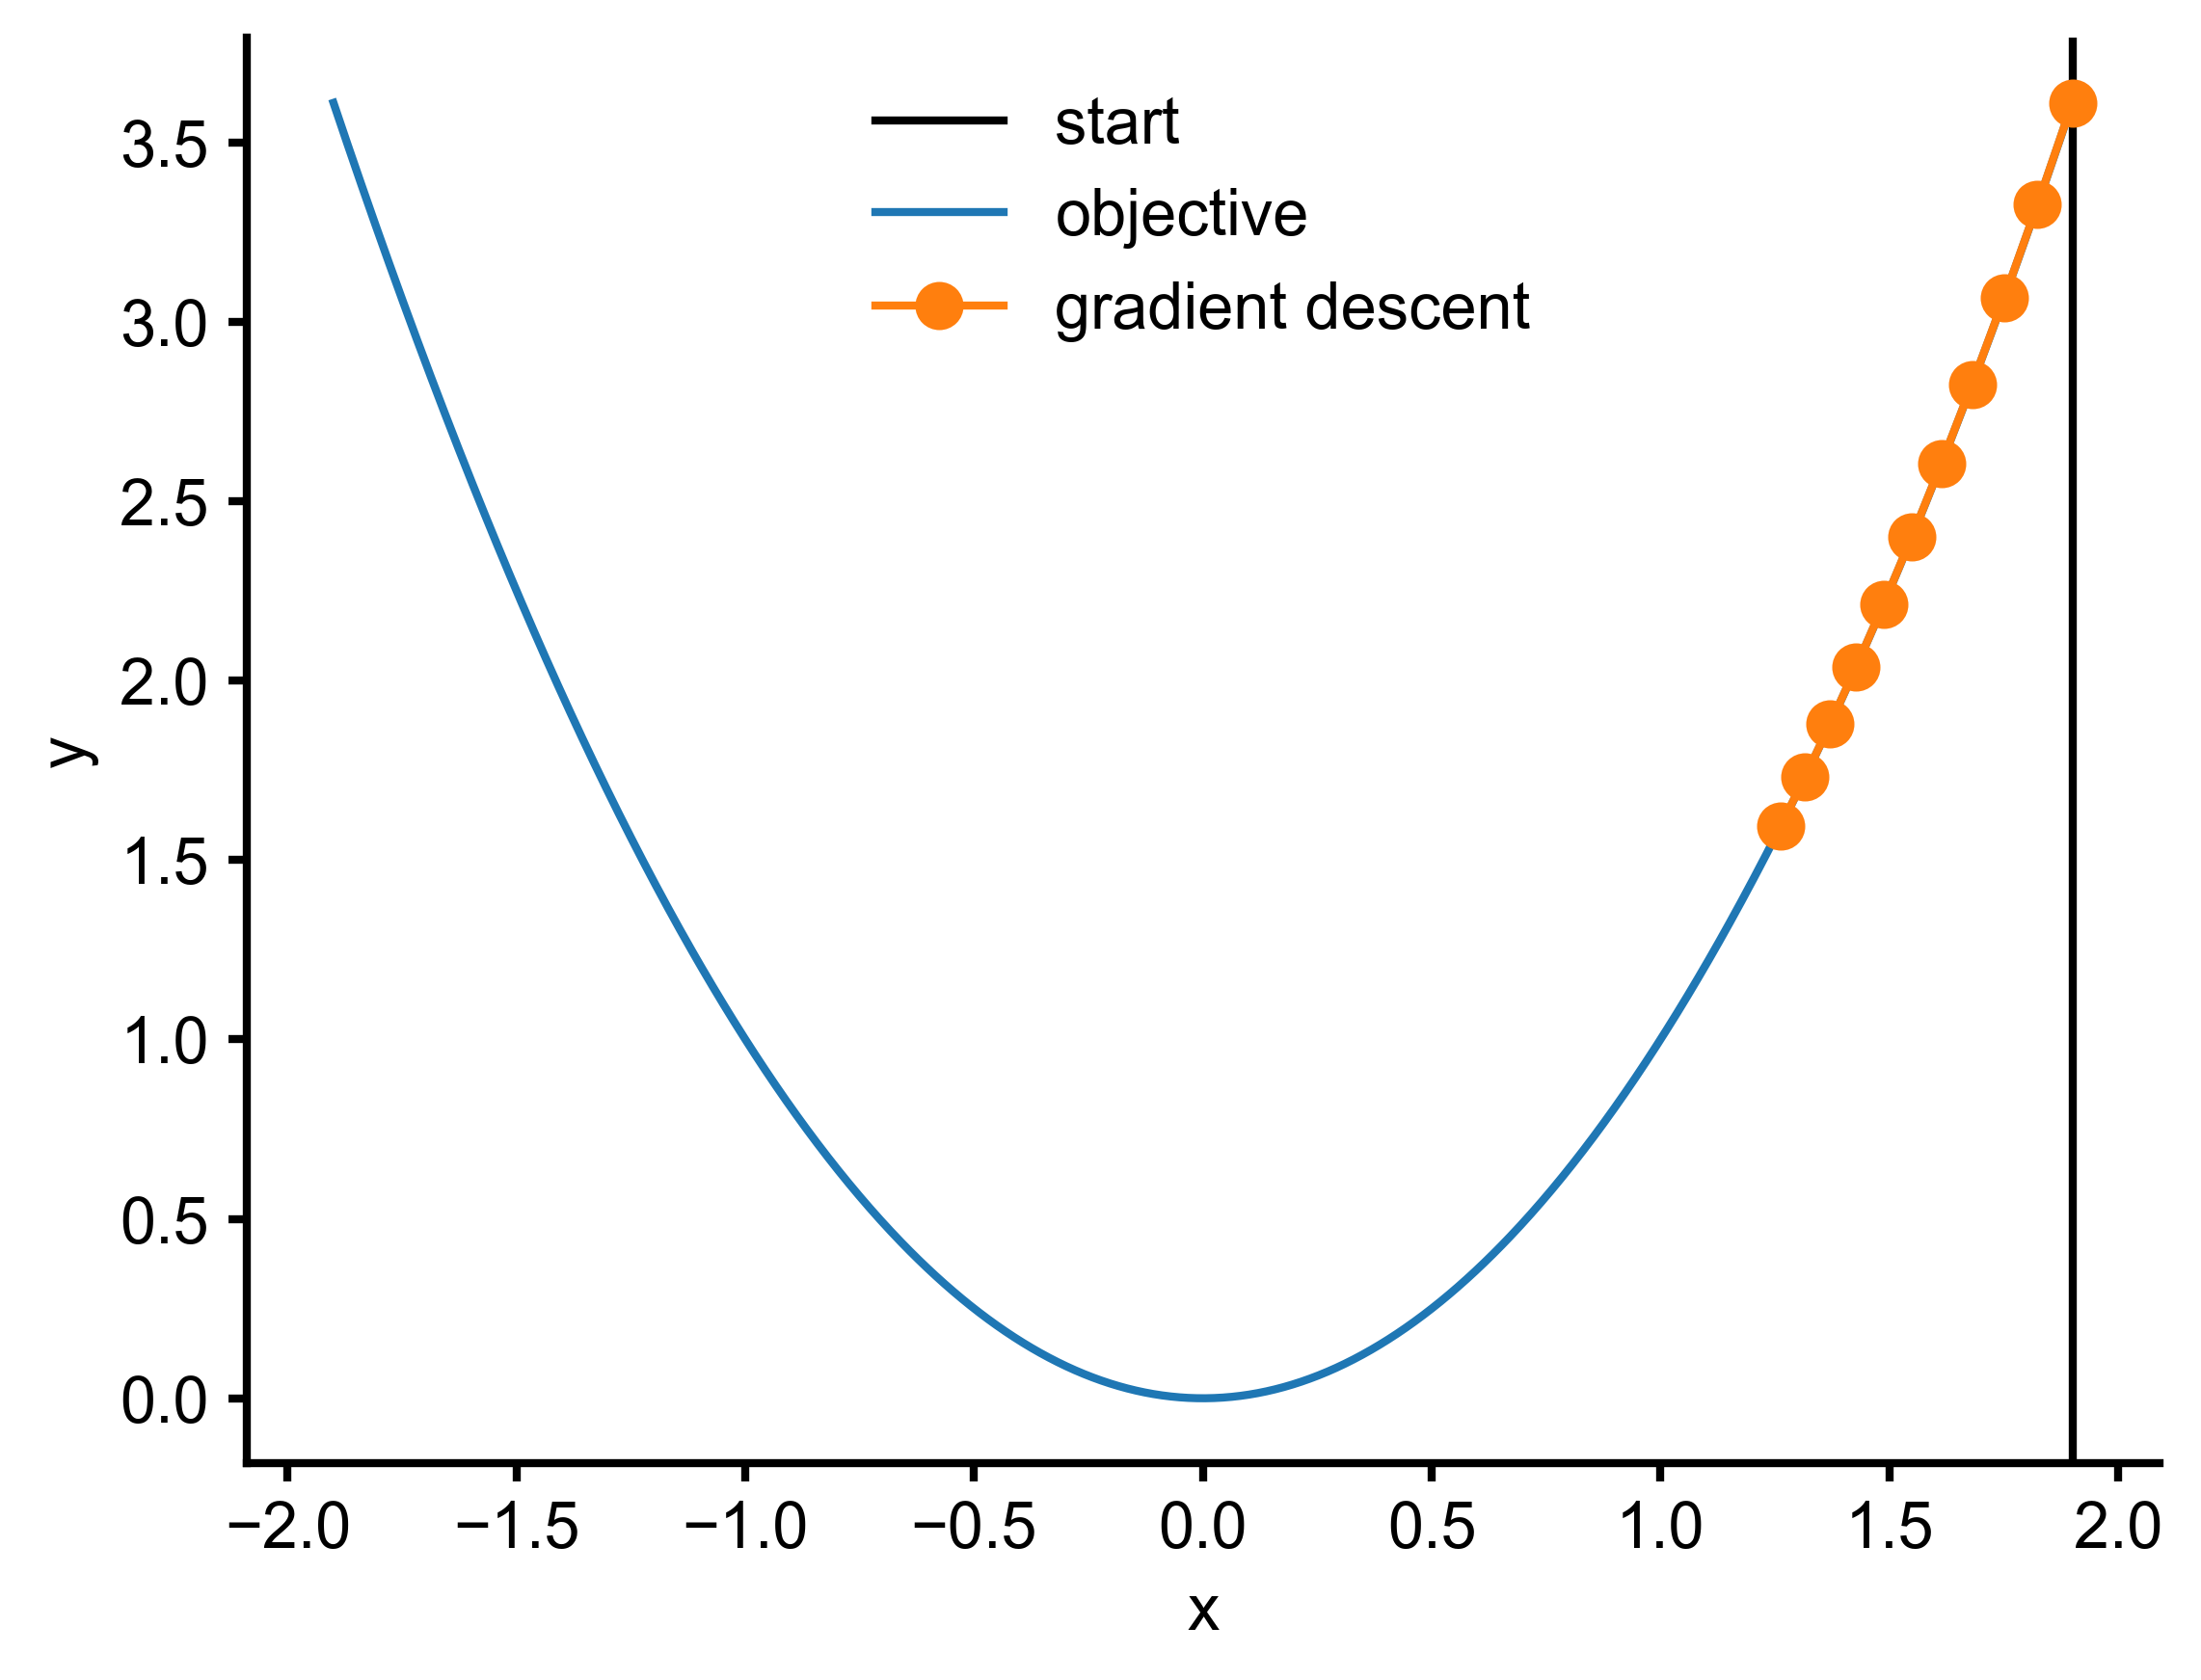

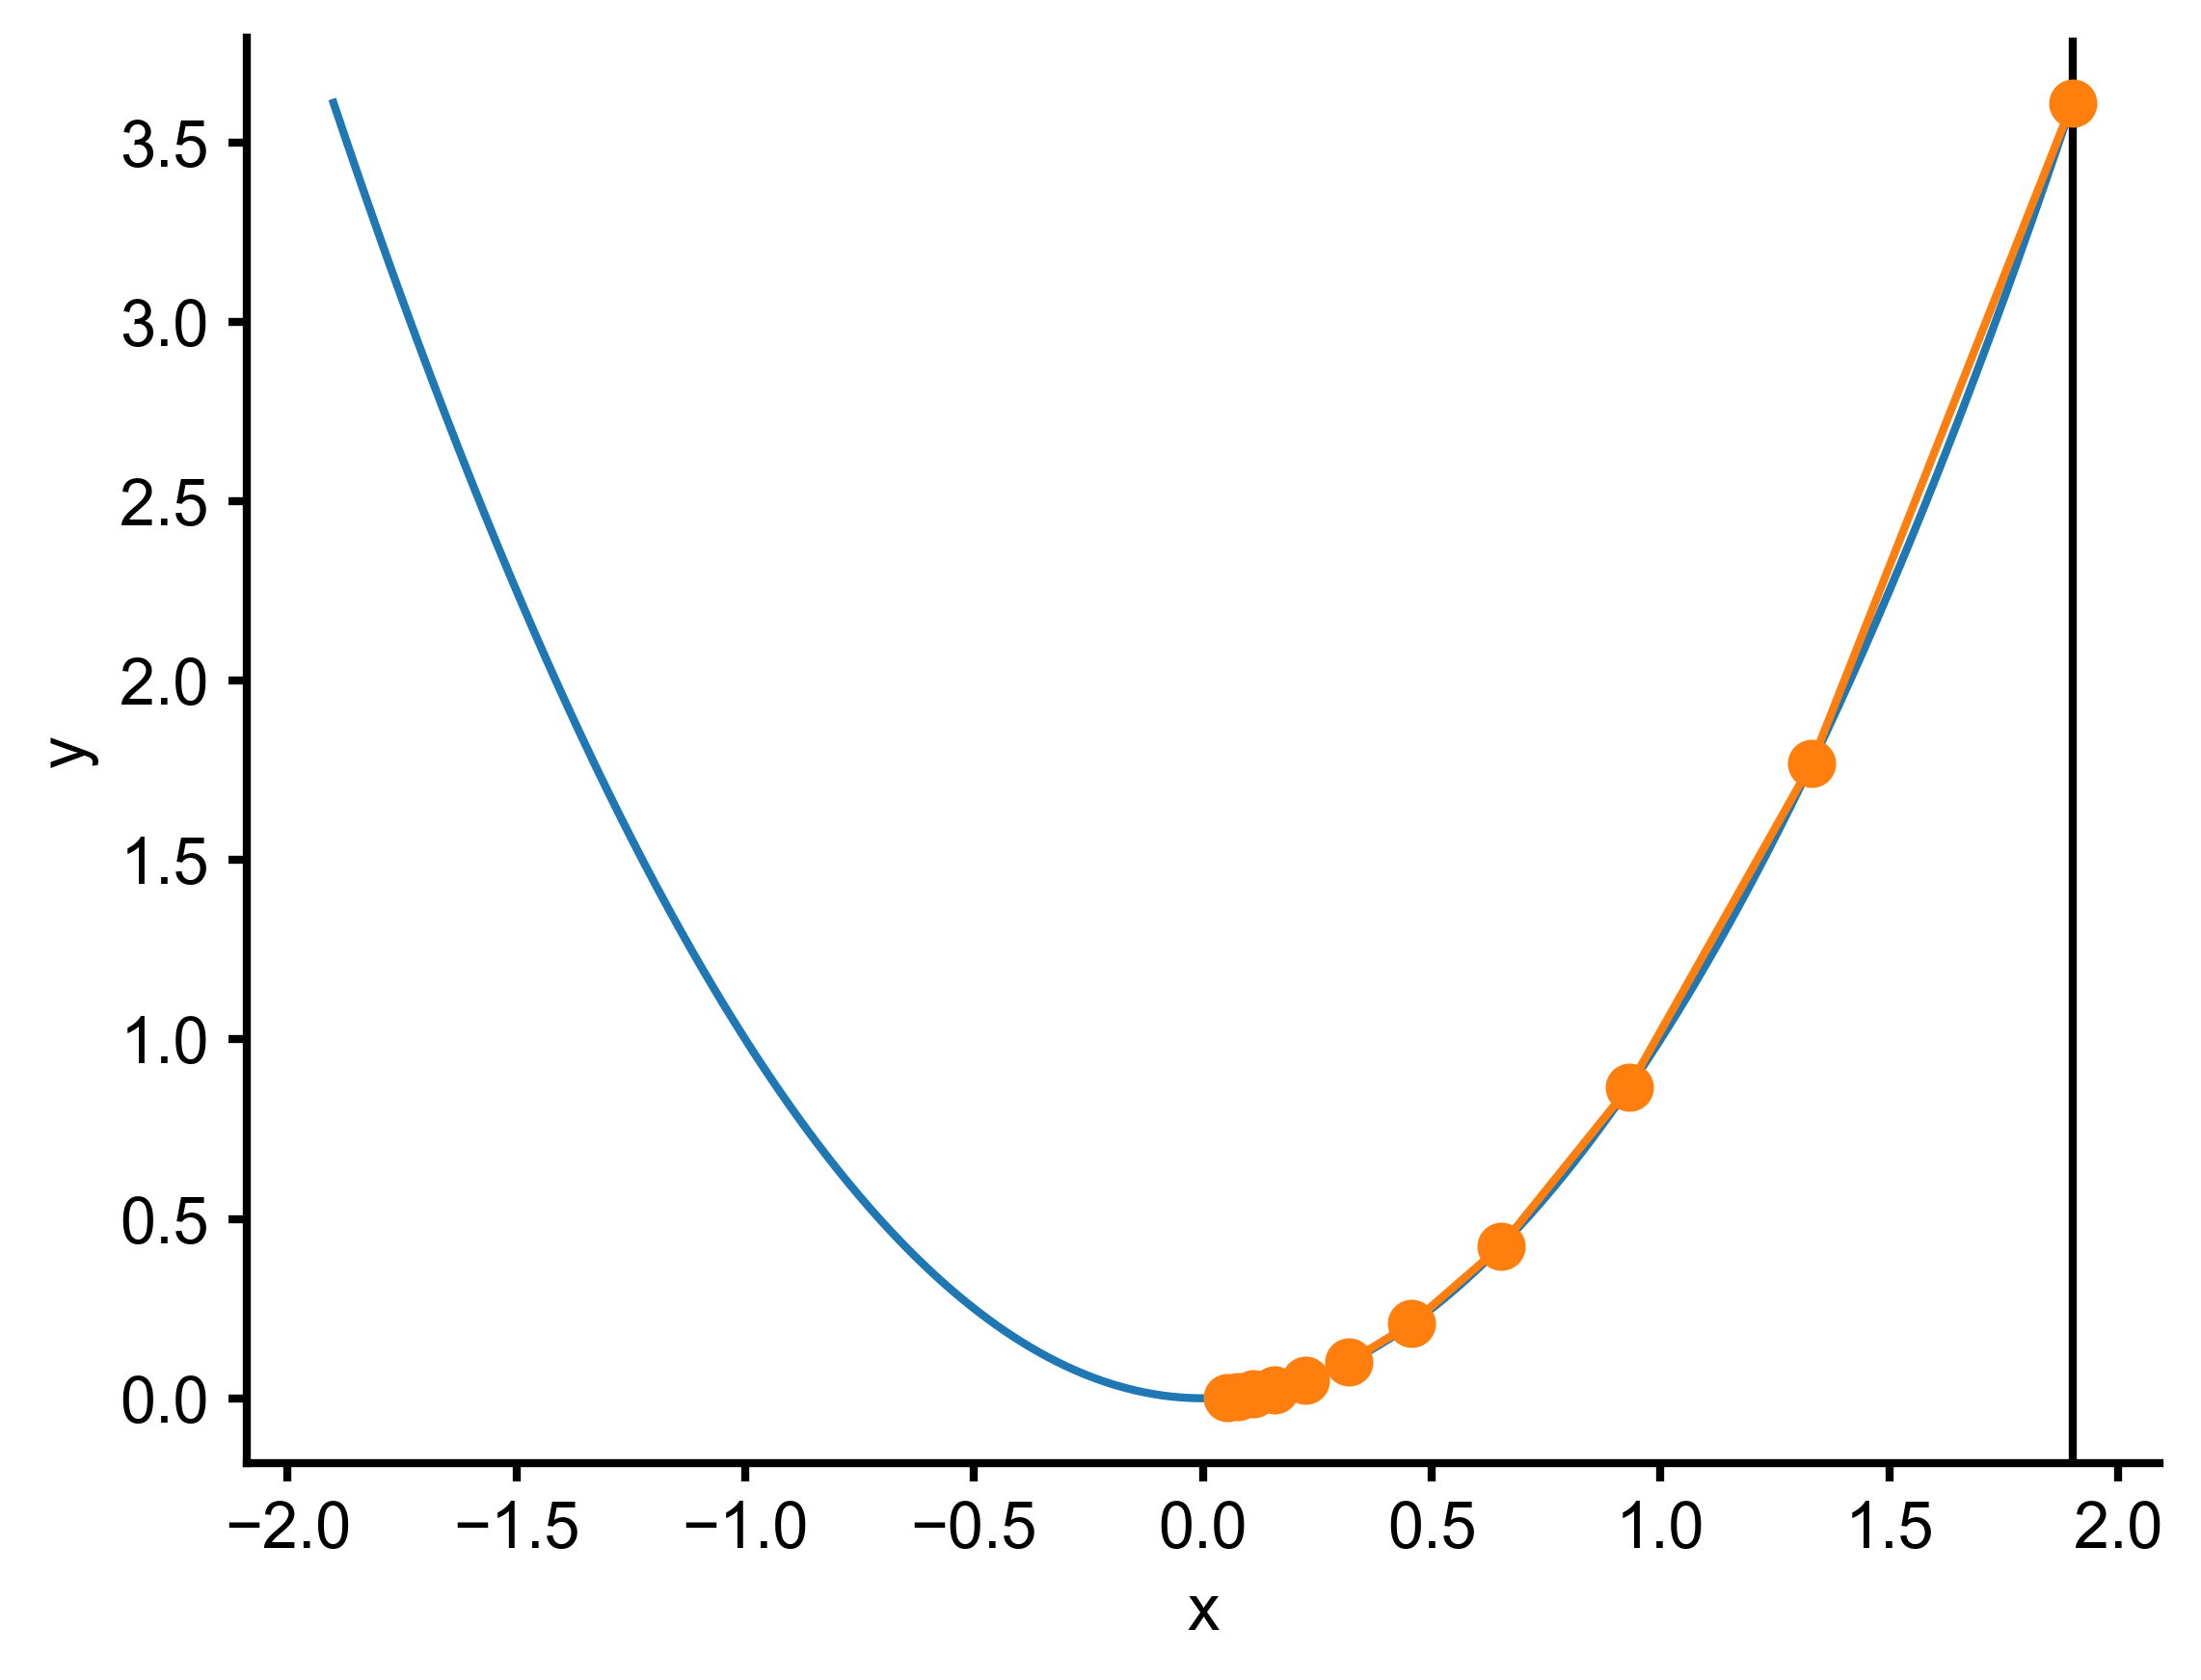

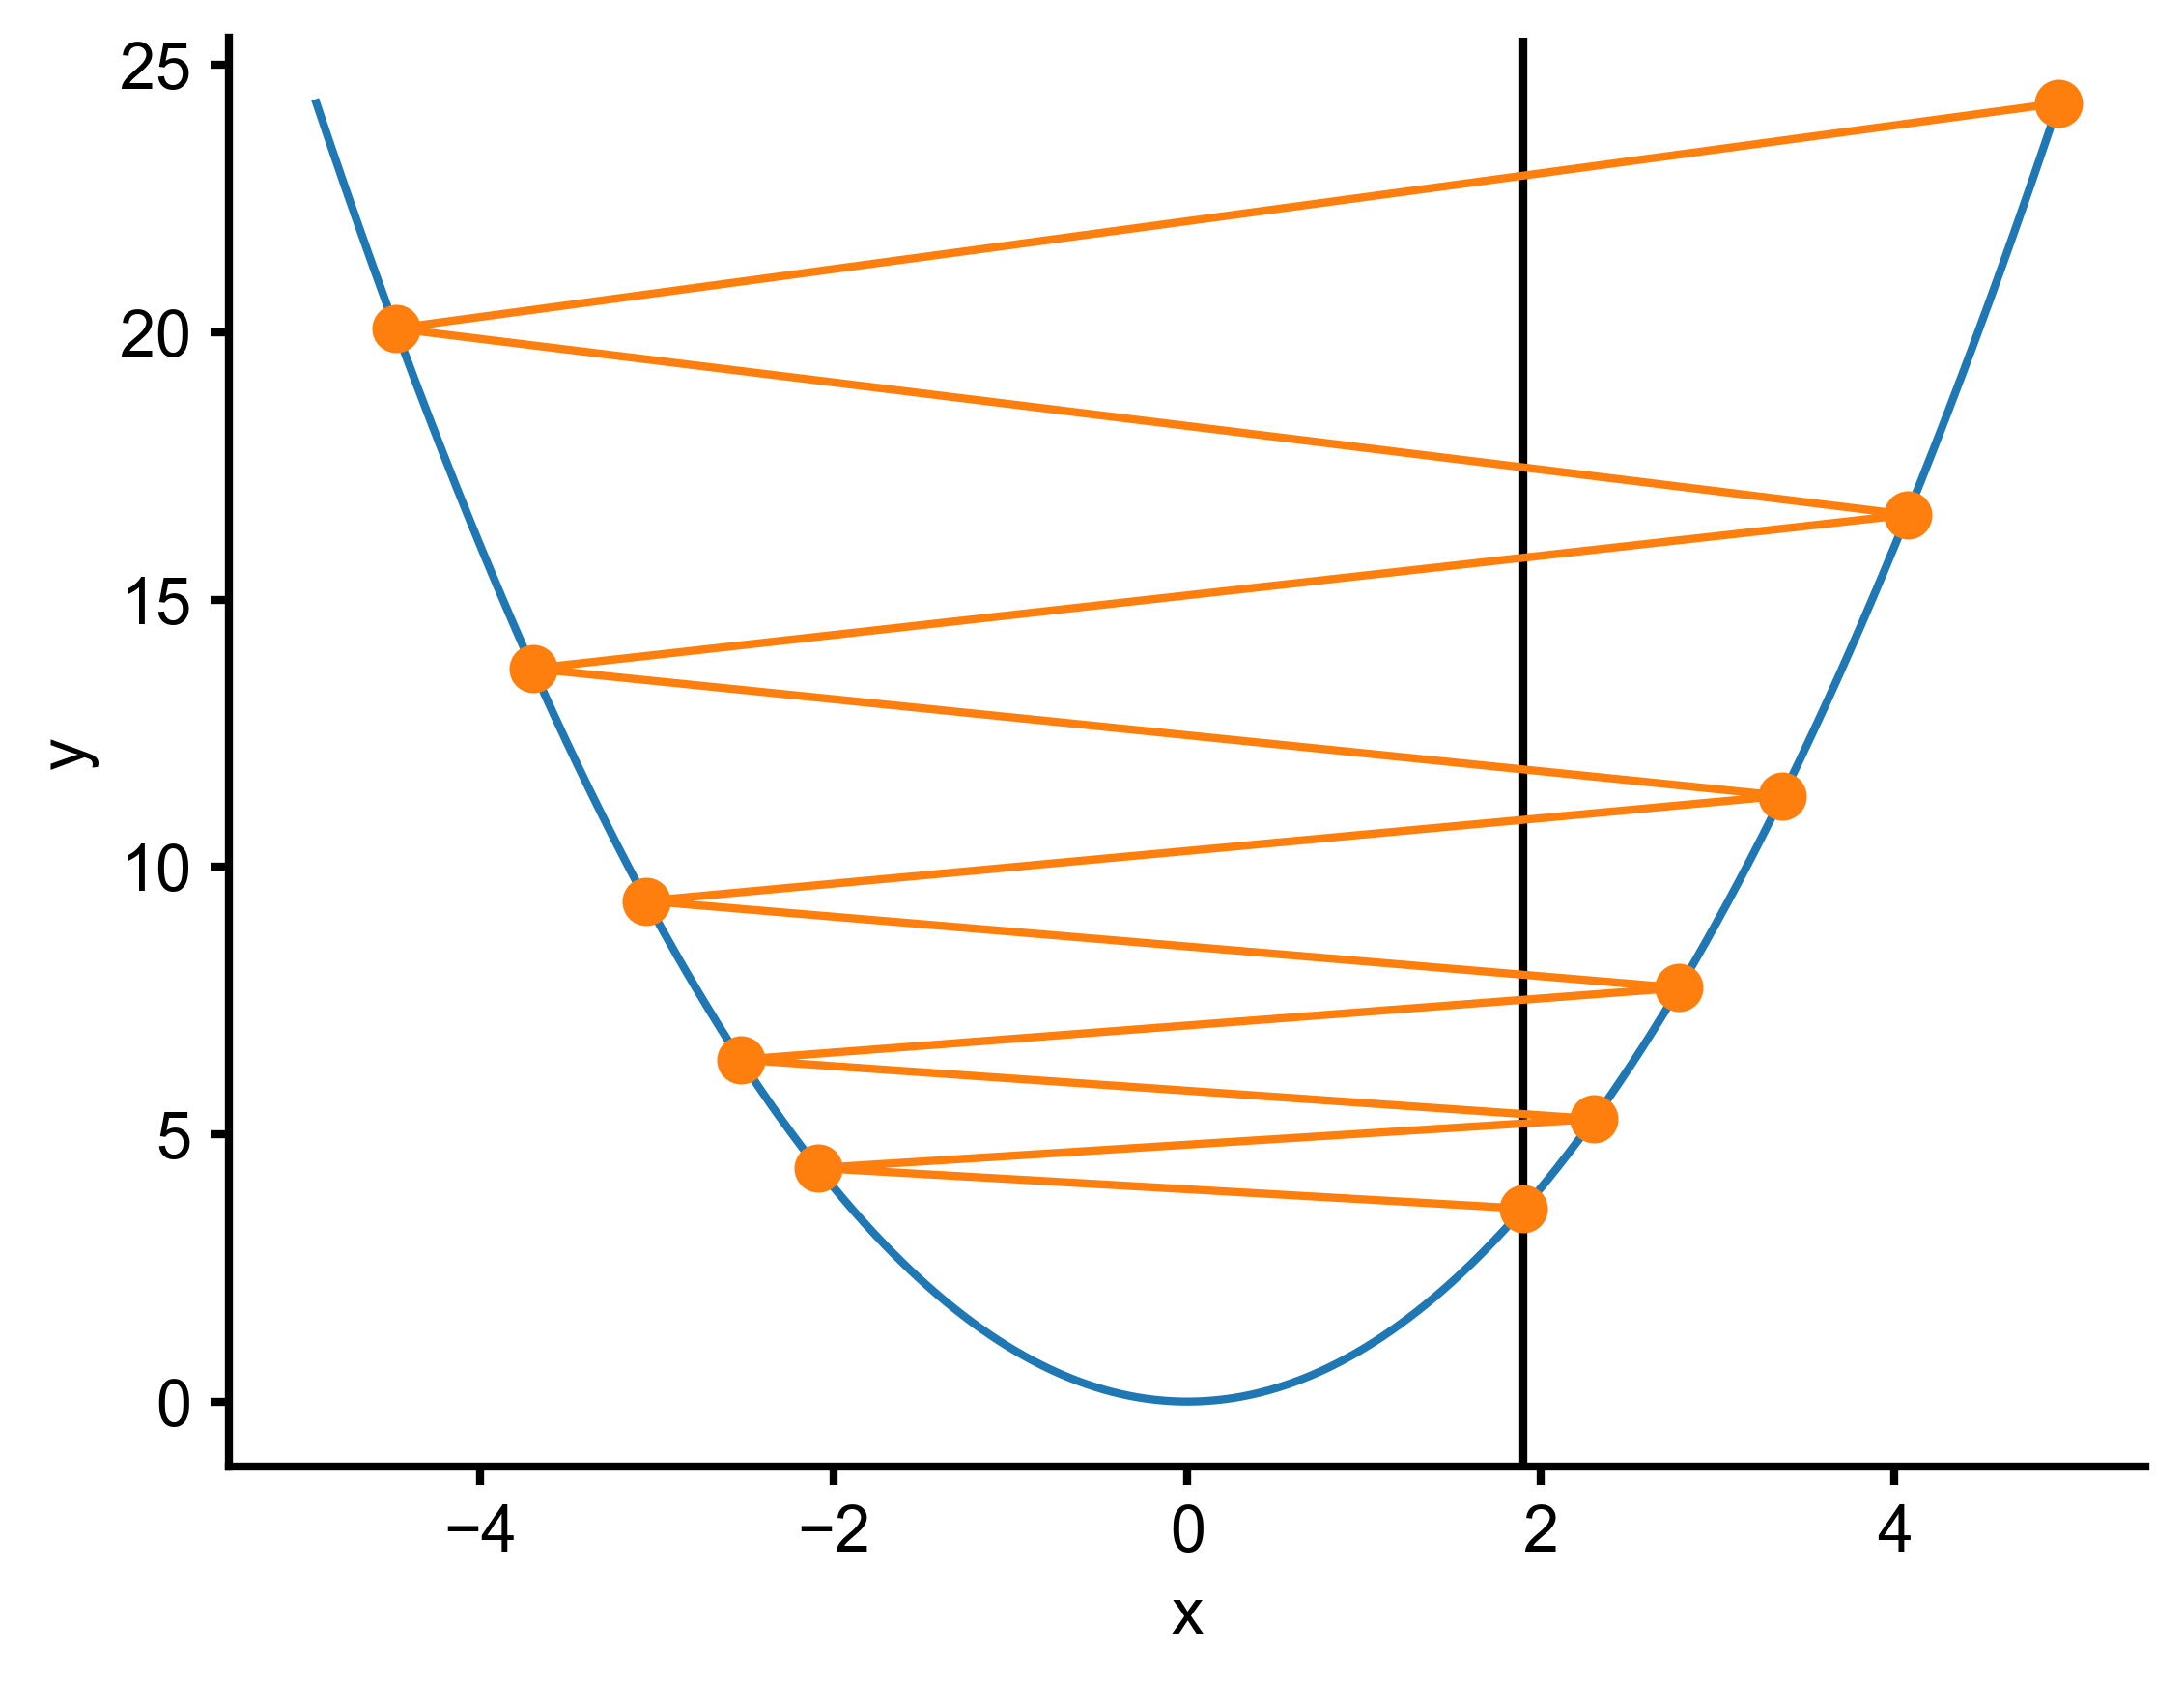

In [89]:

def plot_grad_descent(lr: float = 0.001, iters: int = 10, legend: bool = False):
    fig, ax = plt.subplots()
    
    def func(x):
        return x ** 2
    
    def grad(x):
        return 2 * x
    

    samples = np.empty(iters + 1)
    samples[0] = 1.9
    ax.axvline(samples[0], c="k", label="start")
    for i in range(iters):
        samples[i + 1] = samples[i] - lr * grad(samples[i])
    x = np.linspace(-np.abs(samples).max(), np.abs(samples).max(), 1000)
    y = func(x)
    ax.plot(x, y, label="objective")
    ax.plot(samples, func(samples), "o-", label="gradient descent", markersize=8)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    
    if legend:
        ax.legend()
    
    return fig, ax

fig, _ = plot_grad_descent(0.02, 10, legend=True)
fig.savefig("figs/standard/GD_small.pdf")    
fig, _ = plot_grad_descent(0.15, 10, legend=False)
fig.savefig("figs/standard/GD_mid.pdf")    
fig, _ = plot_grad_descent(1.05, 10, legend=False)
fig.savefig("figs/standard/GD_large.pdf")    

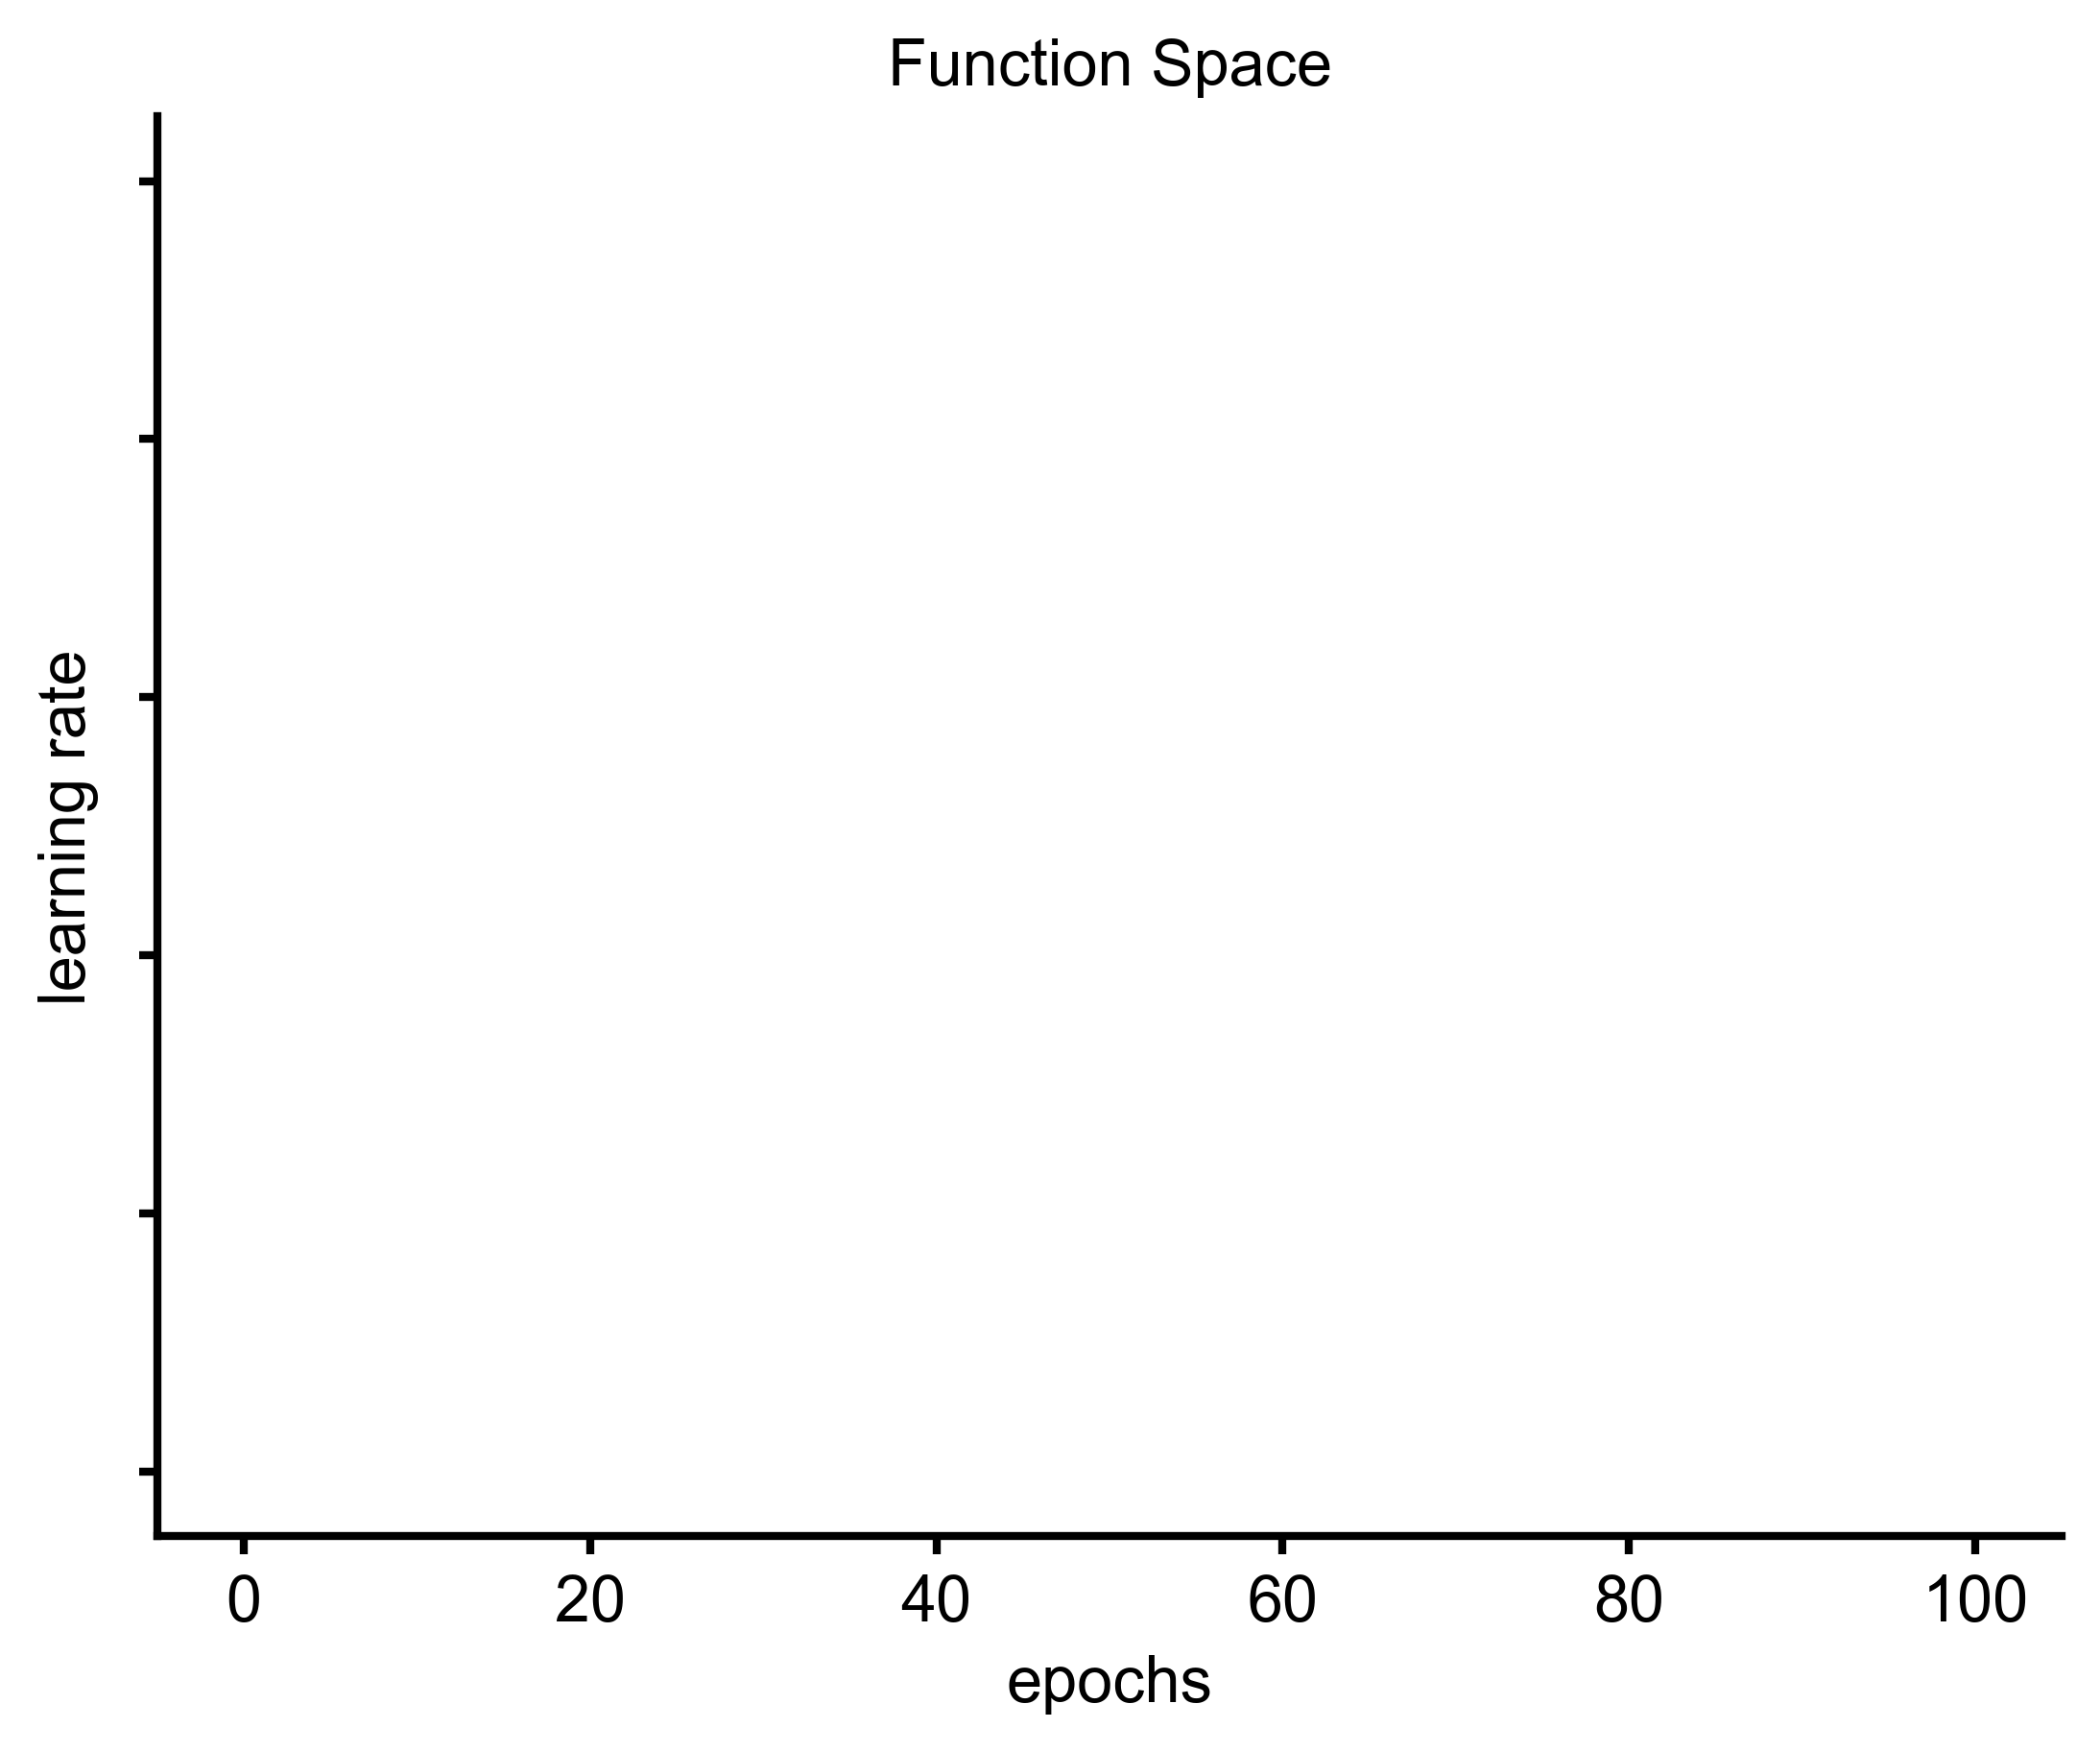

In [90]:
def plot_lr_schedules():
    fig, ax = plt.subplots()
    ax.set_xlabel("epochs")
    ax.set_xlim([-5, 105])
    ax.set_ylim([-0.25, 5.25])
    ax.set_yticklabels([])
    ax.set_ylabel("learning rate")
    ax.set_title("Function Space")

    fig.savefig("figs/standard/function_space.pdf")

plot_lr_schedules()

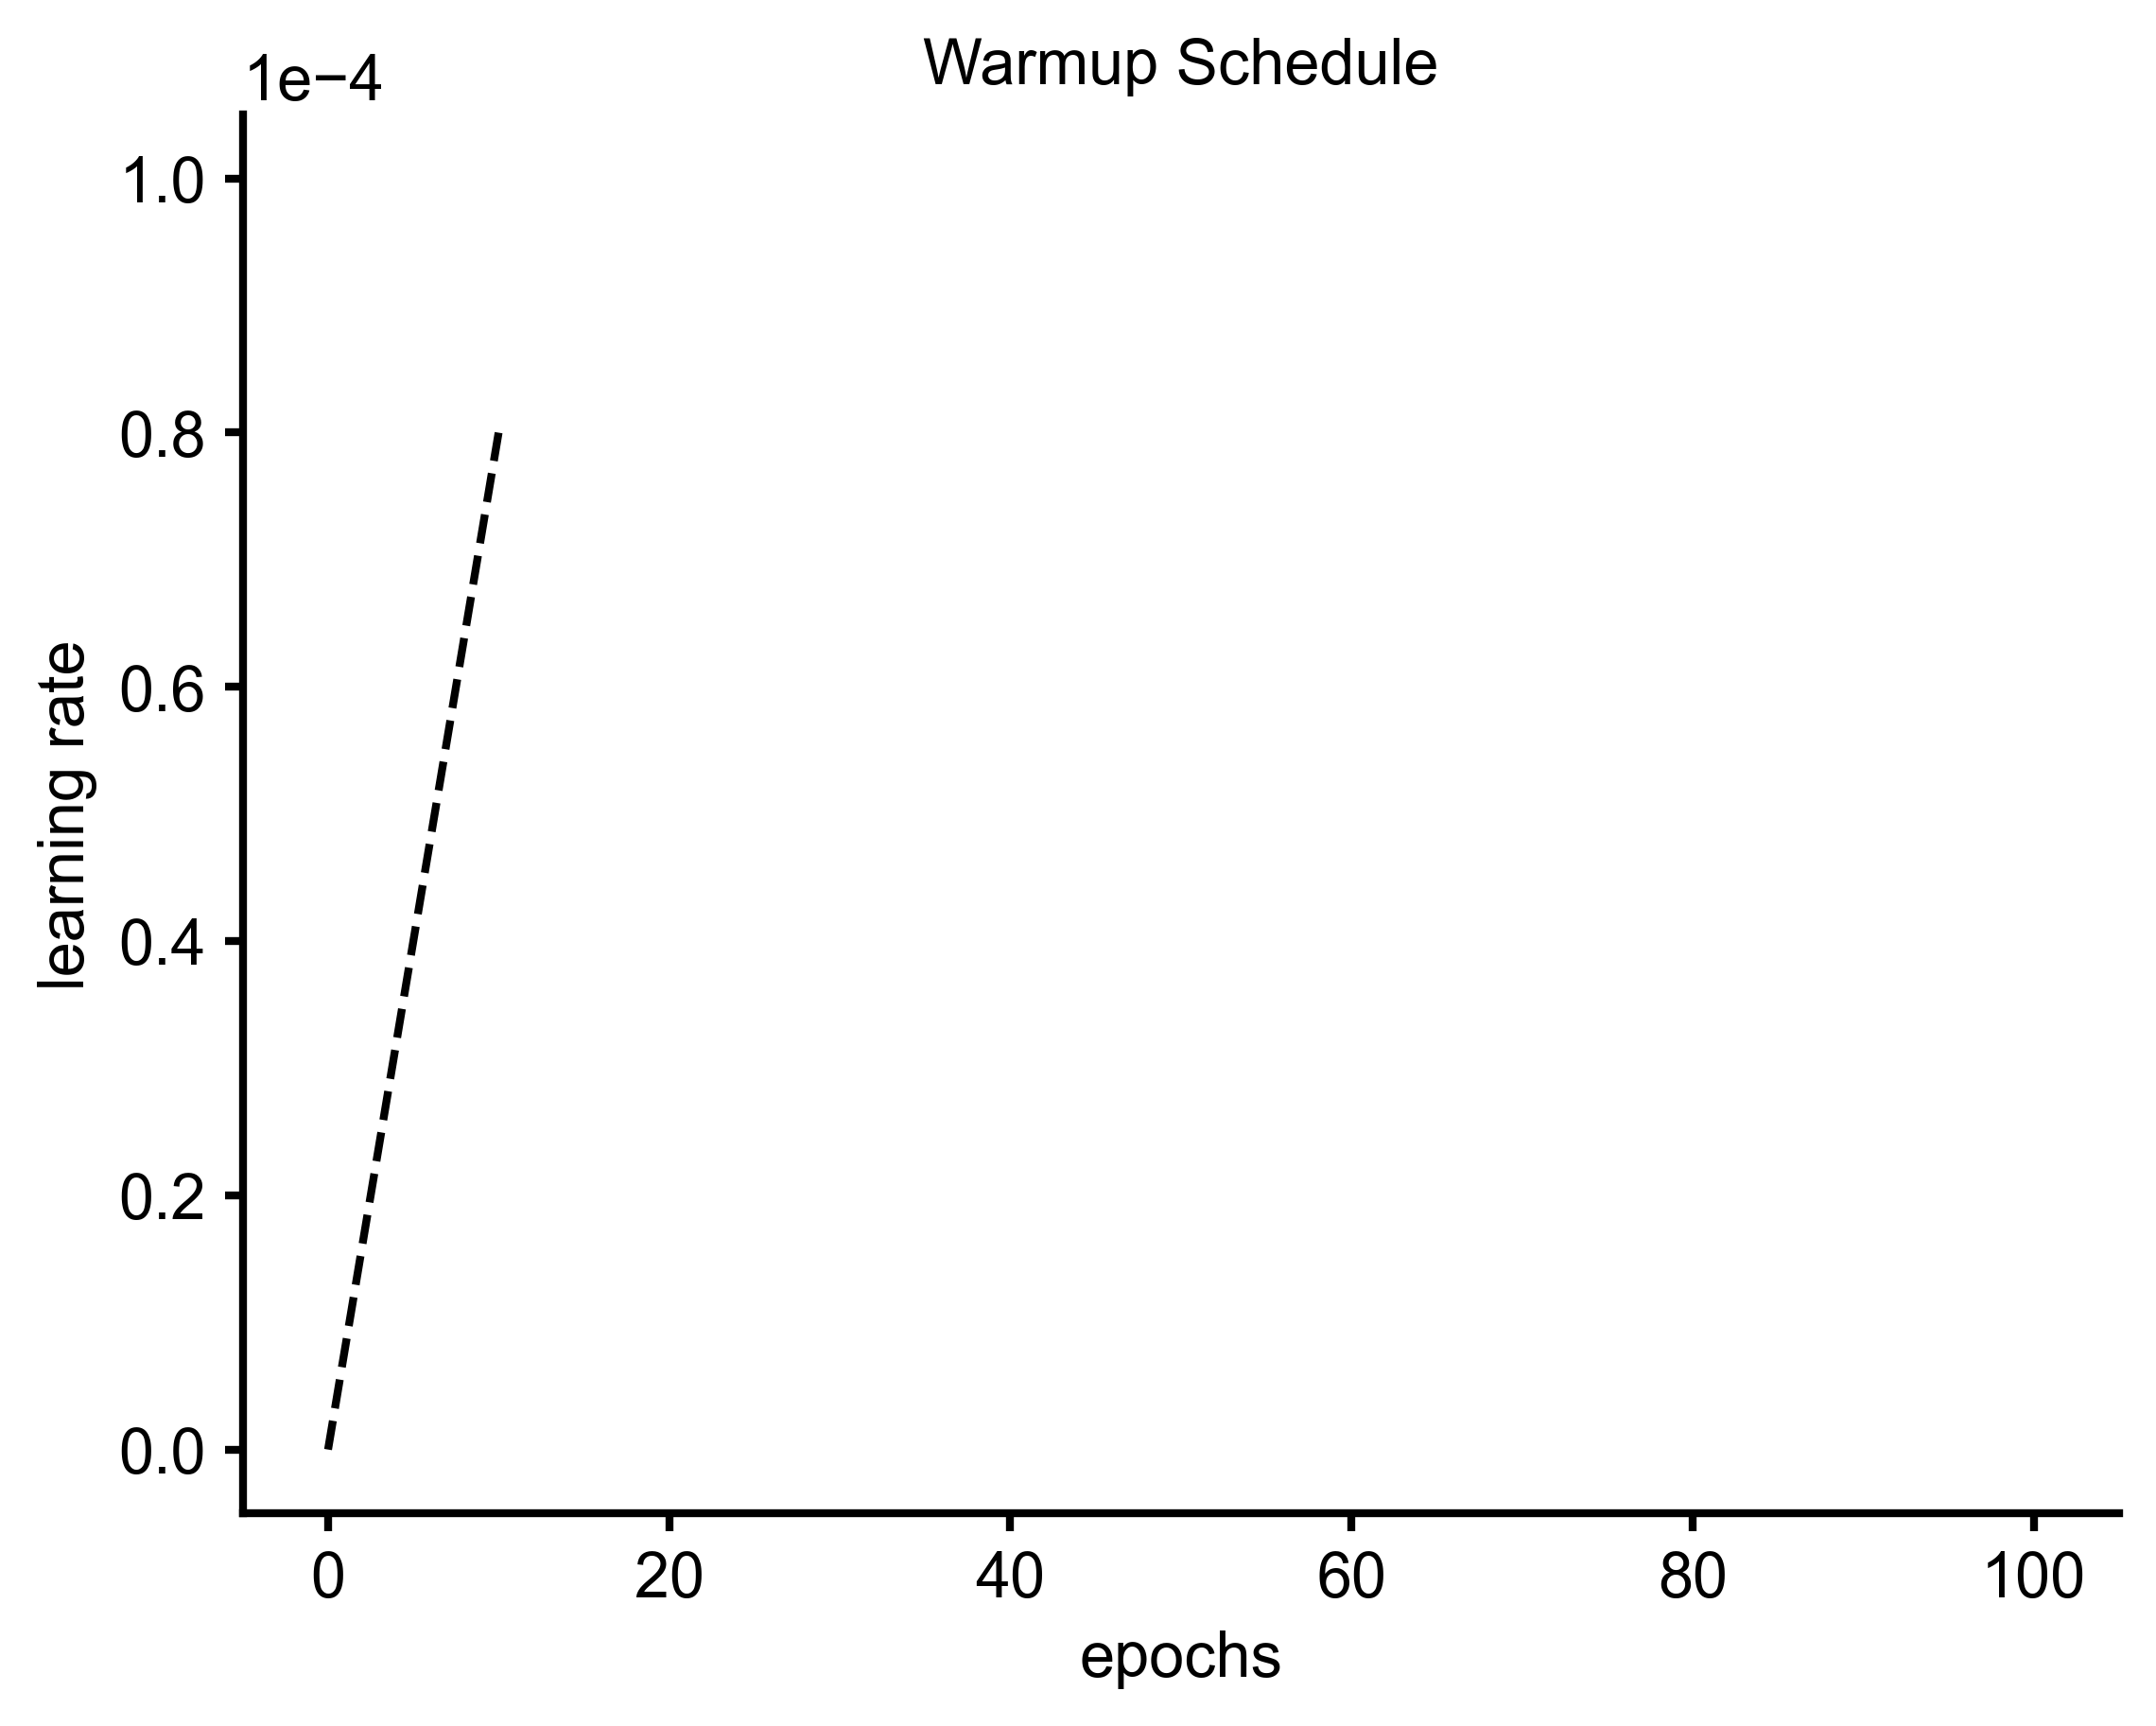

In [91]:
fig, ax = plt.subplots()
ax.set_xlabel("epochs")
ax.set_xlim([-5, 105])
ax.set_ylim((-5e-06, 0.000105))
ax.set_ylabel("learning rate")
ax.set_title("Warmup Schedule")
ax.plot([0, 10], [0, 0.8 * 10**-4], "--", c="k")
# ax.text(40, 0.5 * 5, "?", fontsize=100)
ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    

fig.savefig("figs/standard/warumup_?.pdf")

